# Importation des Bibliothèques

In [1]:
import pandas as pd # manipulation des DataFrame (tableau de données)
import numpy as np # calcul scientifique
import matplotlib.pyplot as plt # visualisation (module pyplot : 2D)
import seaborn as sns # manipulation et visualisation des stats
from imblearn.under_sampling import ClusterCentroids
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score,mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import itertools

# Aperçu des Données

In [2]:
churn_c = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_c

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [3]:
churn_c.shape

(7043, 21)

In [4]:
print('le nombre de lignes est {}'.format(churn_c.shape[0]))
print('le nombre de colonnes est {}'.format(churn_c.shape[1]))

le nombre de lignes est 7043
le nombre de colonnes est 21


In [5]:
churn_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation:**
* Au total, il y a 21 colonnes de données, y compris les types de données int64, float64 et object.
* presque toutes les données  qui doivent être numériques sont de type flottant ou entier. Une exception se trouve dans la       colonne "TotalCharges"  et Churn

In [6]:
churn_c.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [7]:
churn_c.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [8]:
#Calculer le nombre de valeurs distinctes dans Churn
n_distinct_values = churn_c['Churn'].nunique()

# Afficher le nombre de récurrence de chaque valeur dans Churn
value_counts = churn_c['Churn'].value_counts()

print("Nombre de valeurs distinctes dans Colonne1 : ", n_distinct_values)
print("Nombre de récurrence de chaque valeur dans Colonne1 : \n", value_counts)

Nombre de valeurs distinctes dans Colonne1 :  2
Nombre de récurrence de chaque valeur dans Colonne1 : 
 No     5174
Yes    1869
Name: Churn, dtype: int64


* Déséquilibre de classe : La colonne "Churn" présente un déséquilibre de classe, avec un nombre significativement plus élevé de clients "No" (5174) par rapport aux clients "Yes" (1869). Ce déséquilibre peut avoir un impact sur les performances des modèles de prédiction du churn, car il peut y avoir un biais vers la classe majoritaire. Il peut être nécessaire de prendre en compte ce déséquilibre lors de la sélection du modèle et de l'évaluation des performances.

* Objectif de prédiction : Étant donné que la colonne "Churn" est la variable cible, l'objectif principal pourrait être de prédire si un client se désabonne ("Yes") ou non ("No"). Les résultats obtenus dans cette colonne peuvent être utilisés pour entraîner des modèles prédictifs.

In [9]:
# Parcourir toutes les colonnes du dataframe
for col in churn_c.columns:

    # Calculer le nombre de valeurs distinctes dans la colonne
    n_distinct_values = churn_c[col].nunique()

    # Afficher le nombre de récurrences de chaque valeur dans la colonne
    value_counts = churn_c[col].value_counts()

    # Afficher les résultats
    print("Colonne : ", col)
    print("Nombre de valeurs distinctes : ", n_distinct_values)
    print("Nombre de récurrence de chaque valeur : \n", value_counts)
    print("\n")

Colonne :  customerID
Nombre de valeurs distinctes :  7043
Nombre de récurrence de chaque valeur : 
 7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64


Colonne :  gender
Nombre de valeurs distinctes :  2
Nombre de récurrence de chaque valeur : 
 Male      3555
Female    3488
Name: gender, dtype: int64


Colonne :  SeniorCitizen
Nombre de valeurs distinctes :  2
Nombre de récurrence de chaque valeur : 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Colonne :  Partner
Nombre de valeurs distinctes :  2
Nombre de récurrence de chaque valeur : 
 No     3641
Yes    3402
Name: Partner, dtype: int64


Colonne :  Dependents
Nombre de valeurs distinctes :  2
Nombre de récurrence de chaque valeur : 
 No     4933
Yes    2110
Name: Dependents, dtype: int64


Colonne :  tenure
Nombre de valeurs distinctes :  73
Nombre de

* La colonne "CustomerID" du DataFrame "churn_c" contient 7043 valeurs distinctes et chaque valeur apparaît une seule fois. Cela signifie que chaque client a un identifiant unique dans la colonne "CustomerID". Cette colonne ne contient pas d'informations pertinentes pour l'analyse donc on va supprimer. Cette suppression peut aider à éliminer les redondances et à simplifier les calculs ou les opérations ultérieures.

In [10]:
#supprimer la colonne CustomerID
churn_c = churn_c.drop('customerID', axis=1)

In [11]:
churn_c

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
1                  No               Mailed check           56.95       1889.5   
2                 Yes               Mailed check           53.85       108.15   
3                  No  Bank transfer (automatic)           42.30      1840.75   
4                 Yes           Electronic check           70.70       151.65   
...               ...                        ...             ...          ...   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 20 columns]

In [12]:
# Vérification les plages de valeurs des données
for col in churn_c:
    print(f'Colonne: {col}')
    print(f'Valueurs: {churn_c[col].unique()[:10]}')
    print('---')

Colonne: gender
Valueurs: ['Female' 'Male']
---
Colonne: SeniorCitizen
Valueurs: [0 1]
---
Colonne: Partner
Valueurs: ['Yes' 'No']
---
Colonne: Dependents
Valueurs: ['No' 'Yes']
---
Colonne: tenure
Valueurs: [ 1 34  2 45  8 22 10 28 62 13]
---
Colonne: PhoneService
Valueurs: ['No' 'Yes']
---
Colonne: MultipleLines
Valueurs: ['No phone service' 'No' 'Yes']
---
Colonne: InternetService
Valueurs: ['DSL' 'Fiber optic' 'No']
---
Colonne: OnlineSecurity
Valueurs: ['No' 'Yes' 'No internet service']
---
Colonne: OnlineBackup
Valueurs: ['Yes' 'No' 'No internet service']
---
Colonne: DeviceProtection
Valueurs: ['No' 'Yes' 'No internet service']
---
Colonne: TechSupport
Valueurs: ['No' 'Yes' 'No internet service']
---
Colonne: StreamingTV
Valueurs: ['No' 'Yes' 'No internet service']
---
Colonne: StreamingMovies
Valueurs: ['No' 'Yes' 'No internet service']
---
Colonne: Contract
Valueurs: ['Month-to-month' 'One year' 'Two year']
---
Colonne: PaperlessBilling
Valueurs: ['Yes' 'No']
---
Colonne: Paym

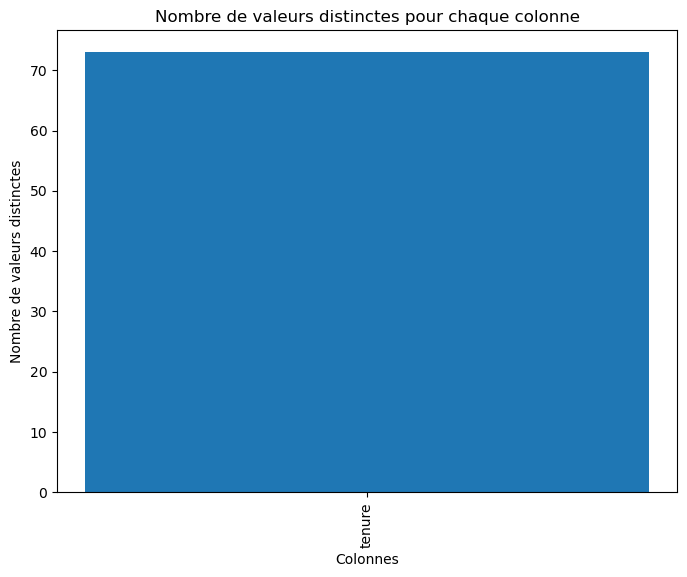

In [13]:
# Créer une liste des colonnes à traiter
columns = ['tenure']

# Créer une liste pour stocker le nombre de valeurs distinctes de chaque colonne
distinct_counts = []

# Calculer le nombre de valeurs distinctes pour chaque colonne et stocker le résultat dans la liste distinct_counts
for column in columns:
    distinct_counts.append(churn_c[column].nunique())

# Créer une figure de taille 8x6 pouces
plt.figure(figsize=(8,6))

# Créer un diagramme en bâtons pour visualiser le nombre de valeurs distinctes pour chaque colonne
plt.bar(columns, distinct_counts)
plt.xticks(rotation=90)
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs distinctes')
plt.title('Nombre de valeurs distinctes pour chaque colonne')
plt.show()

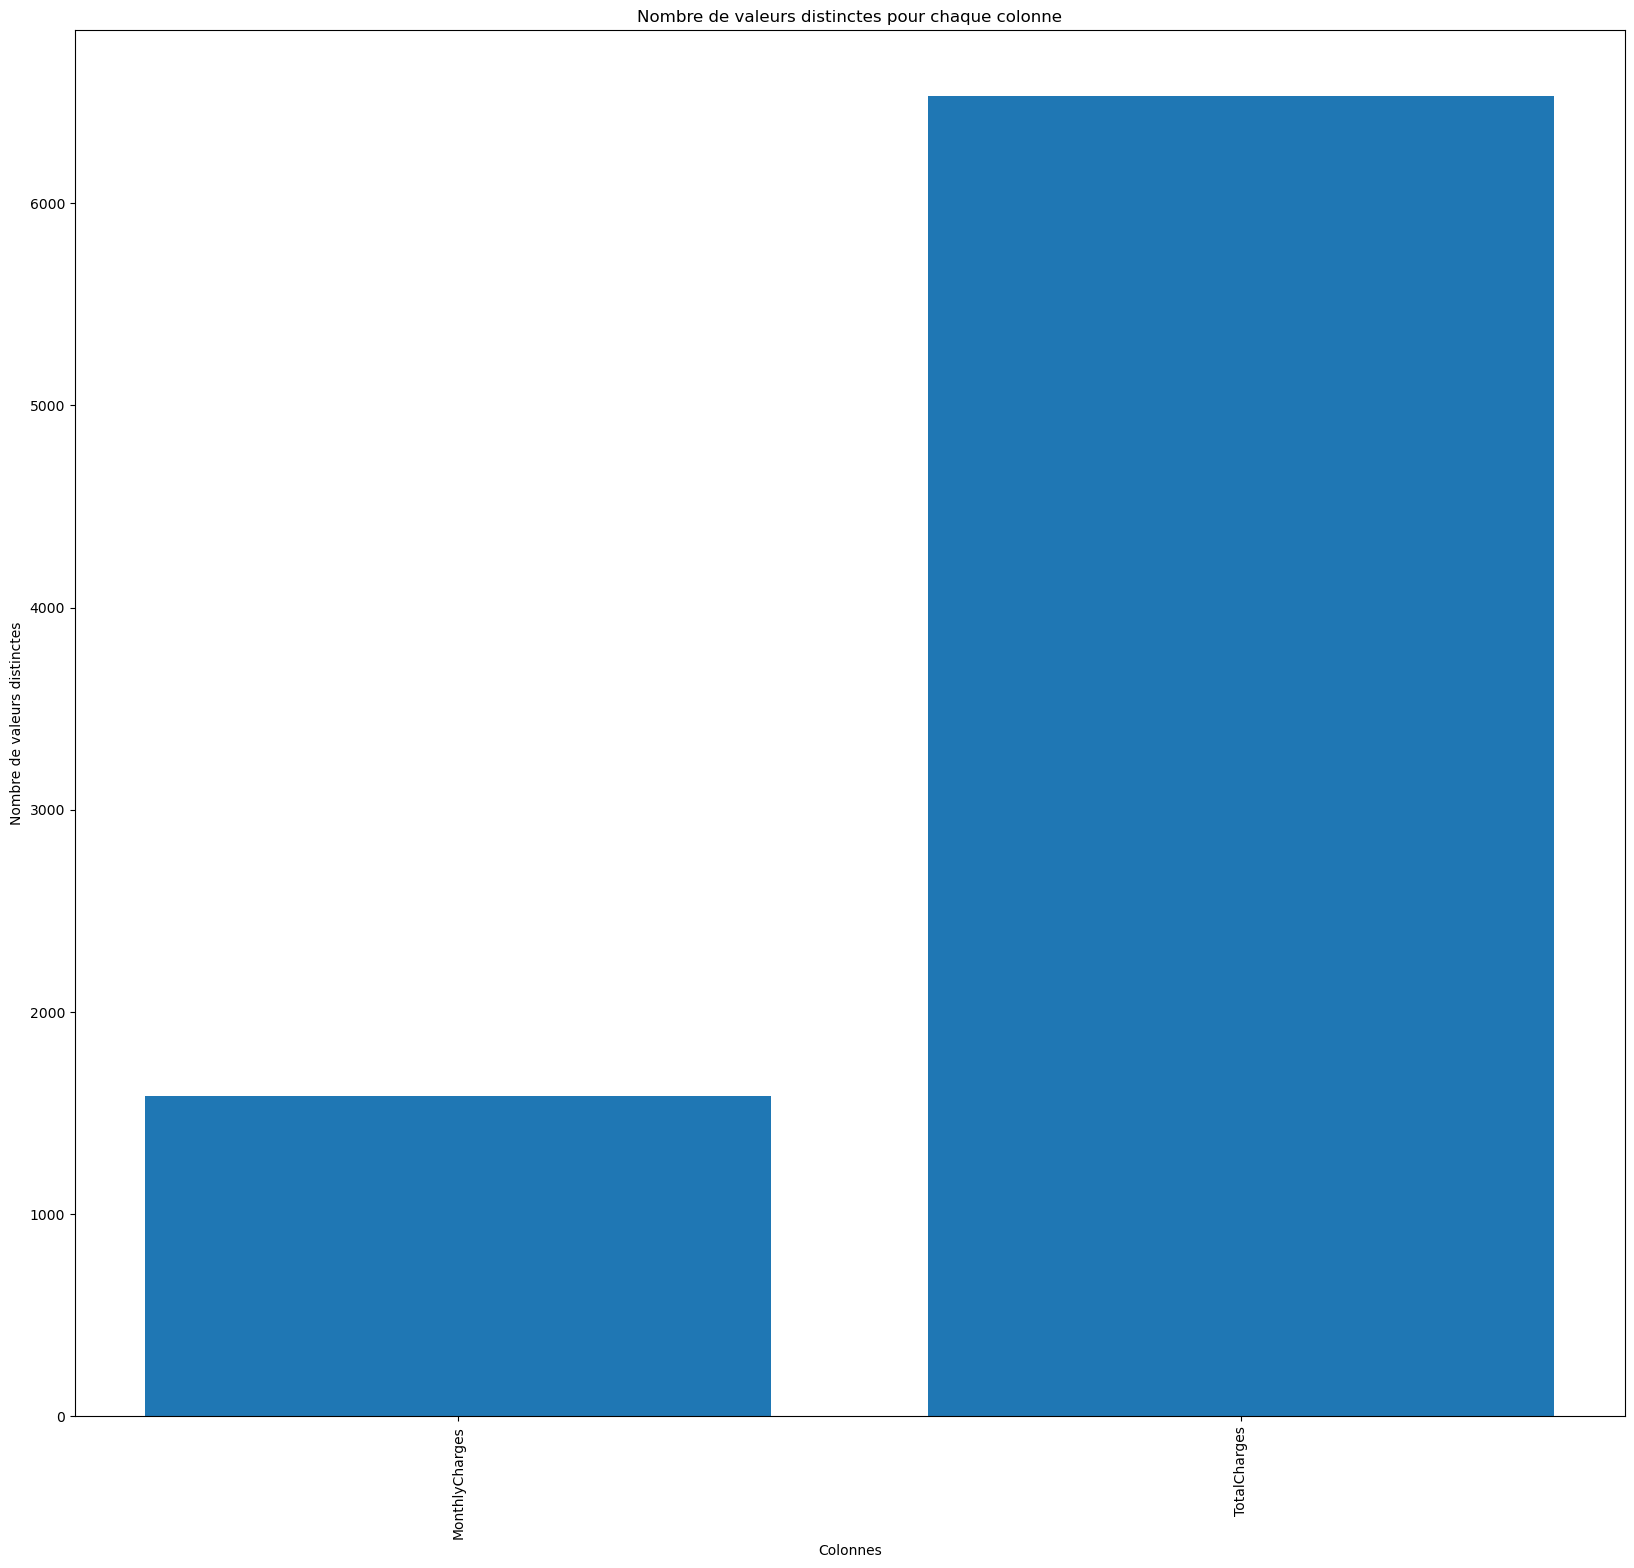

In [14]:
# Créer une liste des colonnes à traiter
columns = ['MonthlyCharges','TotalCharges']

# Créer une liste pour stocker le nombre de valeurs distinctes de chaque colonne
distinct_counts = []

# Calculer le nombre de valeurs distinctes pour chaque colonne et stocker le résultat dans la liste distinct_counts
for column in columns:
    distinct_counts.append(churn_c[column].nunique())

# Créer une figure de taille 20x18 pouces
plt.figure(figsize=(20,18))

# Créer un diagramme en bâtons pour visualiser le nombre de valeurs distinctes pour chaque colonne
plt.bar(columns, distinct_counts)
plt.xticks(rotation=90)
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs distinctes')
plt.title('Nombre de valeurs distinctes pour chaque colonne')
plt.show()

* Visualisation des NA dans les colonnes :

In [15]:
# Créer une figure avec une taille de 15x10 pouces
plt.figure(figsize=(15, 10))

# Créer un DataFrame booléen indiquant les emplacements des valeurs manquantes
is_na = churn_c.isnull()

# Calculer le nombre total de valeurs manquantes dans chaque colonne
num_na = is_na.sum()

#afficher le nombre des NA
print(num_na)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Figure size 1500x1000 with 0 Axes>

### Visualisation des variables discrètes

In [16]:
print(churn_c.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Processing column gender
Processing column SeniorCitizen
Processing column Partner
Processing column Dependents
Processing column PhoneService
Processing column MultipleLines
Processing column InternetService
Processing column OnlineSecurity
Processing column OnlineBackup
Processing column DeviceProtection
Processing column TechSupport
Processing column StreamingTV
Processing column StreamingMovies
Processing column Contract
Processing column PaperlessBilling
Processing column PaymentMethod
Processing column Churn


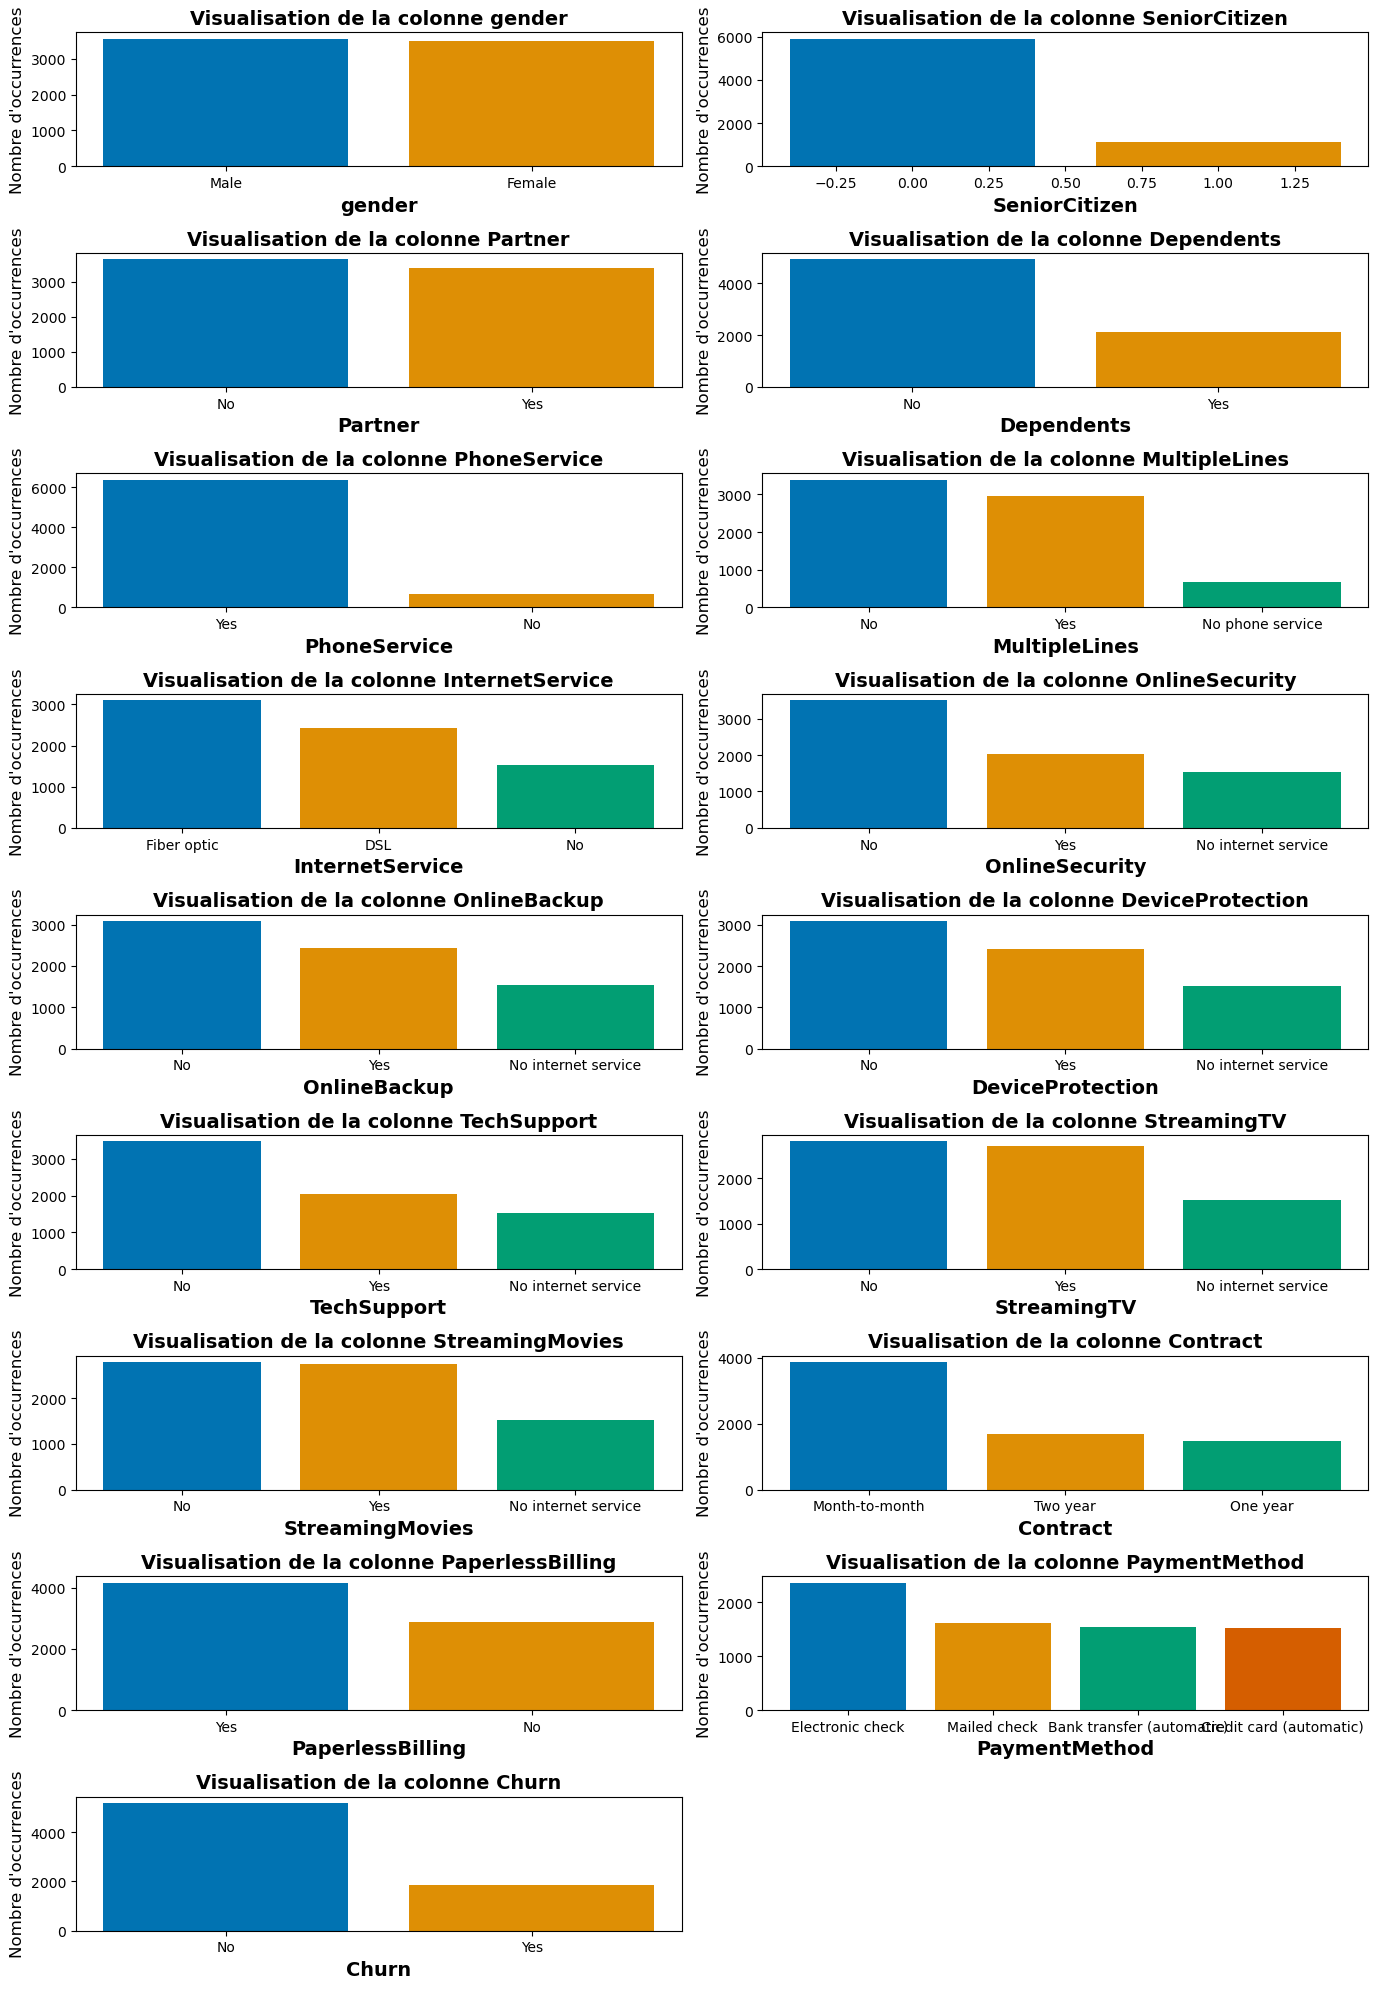

In [17]:
# Colonnes représentant des variables discrètes
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'Churn']

# Définir le nombre de graphiques par ligne
graphs_per_row = 2

# Calculer le nombre total de lignes et de colonnes nécessaires
num_rows = len(columns) // graphs_per_row
if len(columns) % graphs_per_row != 0:
    num_rows += 1
num_cols = min(len(columns), graphs_per_row)

# Créer une nouvelle figure avec une taille de 20x10 pouces
plt.figure(figsize=(14, 20))

# Parcourir les colonnes et créer un graphique à barres pour chaque colonne
for i, col_name in enumerate(columns):
    # Calculer la position du graphique dans la grille
    print(f"Processing column {col_name}") # Add print statement here
    row = i // graphs_per_row
    col = i % graphs_per_row

    # Créer un subplot pour le graphique
    plt.subplot(num_rows, num_cols, i+1)

    # Compter le nombre d'occurrences de chaque valeur unique dans la colonne
    counts = churn_c[col_name].value_counts()

    # Obtenir la palette de couleurs pour les valeurs uniques de la colonne
    colors = sns.color_palette('colorblind', len(counts))

    # Créer un graphique à barres verticales multicouleurs pour les valeurs uniques de la colonne
    plt.bar(counts.index, counts.values, color=colors)

    # Ajouter une légende et des étiquettes d'axe
    plt.xlabel(f"{col_name}", fontsize=14, fontweight='bold')
    plt.ylabel("Nombre d'occurrences", fontsize=12)
    plt.title(f"Visualisation de la colonne {col_name}", fontsize=14, fontweight='bold')

# Ajuster les espacements entre les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

### Observation :
* Certaines fonctionnalités sont considérablement déséquilibrées, par exemple : 'Dependents', 'PhoneService', 'MultipleLines', 'Contract' et 'Churn'. Surtout Churn semble être critique, puisque c'est le label qui est censé être prédit.

### Contribution des variables Categorielles  à 'Churn Value'

##### on va procéder au renommage de valeur pour calculer la contribution des variables discrètes à 'Churn'

In [18]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'Churn']

#all colomns: No=0 , Yes=1, No internet service=2
for col in columns:
    churn_c[col].replace(['No', 'Yes'], [0, 1], inplace=True)
    churn_c[col].replace(['No internet service'], [2], inplace=True)
#Gender: Male=0 , Female=1
churn_c['gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
#Multiple Lines : No phone service=2
churn_c['MultipleLines'].replace(['No phone service'], [2], inplace=True)
#Internet Service : DSL=1 , Fiber optic=2
churn_c['InternetService'].replace(['DSL','Fiber optic'], [1, 2], inplace=True)
#Contract : Month-to-month=0 , One year=1 , Two year=2
churn_c['Contract'].replace(['Month-to-month','One year','Two year'], [0, 1, 2], inplace=True)
#Payment Method : Electronic check=0 , Mailed check=1 , Bank transfer(automatic)=2 , Credit card(automatic)=3
churn_c['PaymentMethod'].replace(['Electronic check' ,'Mailed check' ,'Bank transfer (automatic)' , 'Credit card (automatic)'], [0, 1, 2, 3], inplace=True)



In [19]:
# Parcourir toutes les colonnes du dataframe
for col in churn_c.columns:

    # Calculer le nombre de valeurs distinctes dans la colonne
    n_distinct_values = churn_c[col].nunique()

    # Afficher le nombre de récurrences de chaque valeur dans la colonne
    value_counts = churn_c[col].value_counts()

    # Afficher les résultats
    print("Colonne : ", col)
    print("Nombre de valeurs distinctes : ", n_distinct_values)
    print("Nombre de récurrence de chaque valeur : \n", value_counts)
    print("\n")

Colonne :  gender
Nombre de valeurs distinctes :  2
Nombre de récurrence de chaque valeur : 
 0    3555
1    3488
Name: gender, dtype: int64


Colonne :  SeniorCitizen
Nombre de valeurs distinctes :  2
Nombre de récurrence de chaque valeur : 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64


Colonne :  Partner
Nombre de valeurs distinctes :  2
Nombre de récurrence de chaque valeur : 
 0    3641
1    3402
Name: Partner, dtype: int64


Colonne :  Dependents
Nombre de valeurs distinctes :  2
Nombre de récurrence de chaque valeur : 
 0    4933
1    2110
Name: Dependents, dtype: int64


Colonne :  tenure
Nombre de valeurs distinctes :  73
Nombre de récurrence de chaque valeur : 
 1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Colonne :  PhoneService
Nombre de valeurs distinctes :  2
Nombre de récurrence de chaque valeur : 
 1    6361
0     682
Name: PhoneService, dtype: int64


Col

### Gender

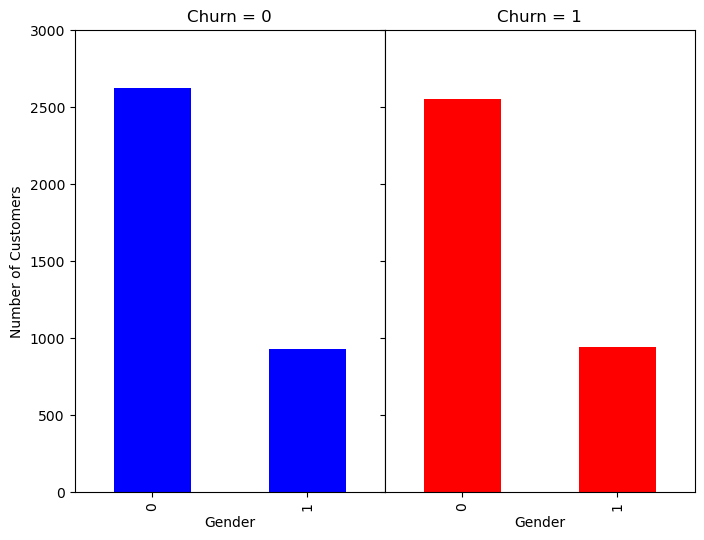

In [20]:
# Créer une nouvelle figure avec une taille de 8x6 pouces
plt.figure(figsize=(8, 6))

# Créer contingency table de Gender et Churn
contingency_table = pd.crosstab(churn_c['gender'], churn_c['Churn'])

# Visualiser la contribution de Gender à Churn, pour Churn = 0 et Churn = 1
churn_0 = contingency_table.loc[0, :]
churn_1 = contingency_table.loc[1, :]

plt.subplot(1, 2, 1)
churn_0.plot(kind='bar', color='blue')
plt.title('Churn = 0')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.ylim([0, 3000])

plt.subplot(1, 2, 2)
churn_1.plot(kind='bar', color='red')
plt.title('Churn = 1')
plt.xlabel('Gender')
plt.ylim([0, 3000])
plt.gca().axes.yaxis.set_ticklabels([]) # disable y-axis tick labels

plt.subplots_adjust(wspace=0)
plt.show()



##### 'Gender' ne semble pas être une caractéristique précieuse pour la prévision du taux de désabonnement. Les valeurs sont uniformément réparties

### Senior Citizen

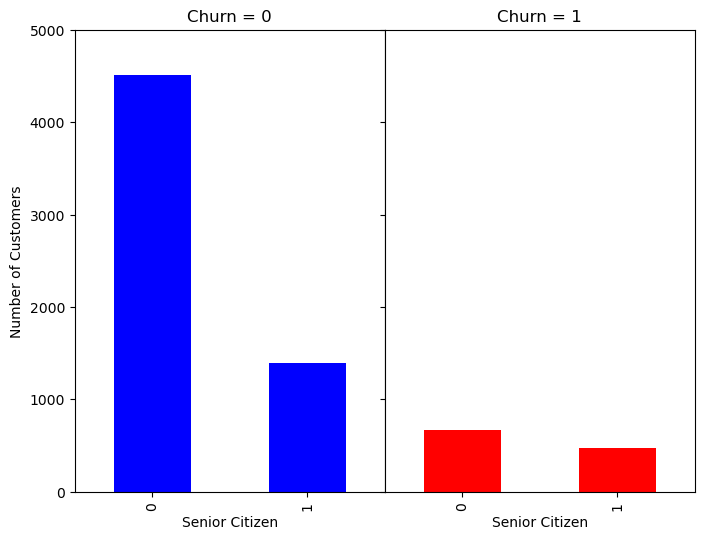

In [21]:
# Créer une nouvelle figure avec une taille de 8x6 pouces
plt.figure(figsize=(8, 6))

# Créer contingency table de Senior Citizen et Churn
contingency_table = pd.crosstab(churn_c['SeniorCitizen'], churn_c['Churn'])

# Visualiser la contribution de Senior Citizen à Churn, pour Churn = 0 et Churn = 1
churn_0 = contingency_table.loc[0, :]
churn_1 = contingency_table.loc[1, :]

plt.subplot(1, 2, 1)
churn_0.plot(kind='bar', color='blue')
plt.title('Churn = 0')
plt.xlabel('Senior Citizen')
plt.ylabel('Number of Customers')
plt.ylim([0, 5000])

plt.subplot(1, 2, 2)
churn_1.plot(kind='bar', color='red')
plt.title('Churn = 1')
plt.xlabel('Senior Citizen')
plt.ylim([0, 5000])
plt.gca().axes.yaxis.set_ticklabels([]) # disable y-axis tick labels

plt.subplots_adjust(wspace=0)
plt.show()



##### Les 'senior Citizen' sont presque susceptibles de 'No Churn'. Les jeunes clients sont plus susceptibles de 'Churn'. Cette hypothèse pourrait être biaisée en raison d'un nombre plus faible de personnes 'Senior citizen' dans l'ensemble de données.

### Partner

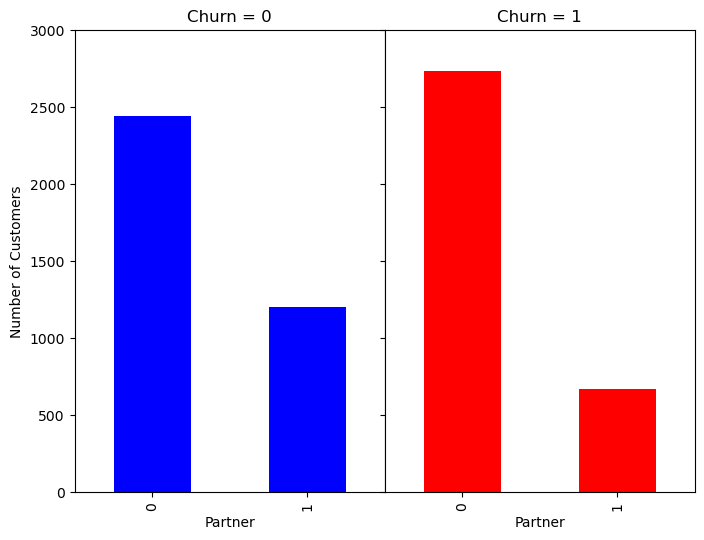

In [22]:
# Créer une nouvelle figure avec une taille de 8x6 pouces
plt.figure(figsize=(8, 6))

# Créer contingency table de Partner et Churn
contingency_table = pd.crosstab(churn_c['Partner'], churn_c['Churn'])

# Visualiser la contribution de Partner à Churn, pour Churn = 0 et Churn = 1
churn_0 = contingency_table.loc[0, :]
churn_1 = contingency_table.loc[1, :]

plt.subplot(1, 2, 1)
churn_0.plot(kind='bar', color='blue')
plt.title('Churn = 0')
plt.xlabel('Partner')
plt.ylabel('Number of Customers')
plt.ylim([0, 3000])

plt.subplot(1, 2, 2)
churn_1.plot(kind='bar', color='red')
plt.title('Churn = 1')
plt.xlabel('Partner')
plt.ylim([0, 3000])
plt.gca().axes.yaxis.set_ticklabels([]) # disable y-axis tick labels

plt.subplots_adjust(wspace=0)
plt.show()



##### Les clients sans partenaire sont un peu plus susceptibles de chuter

### Dependents

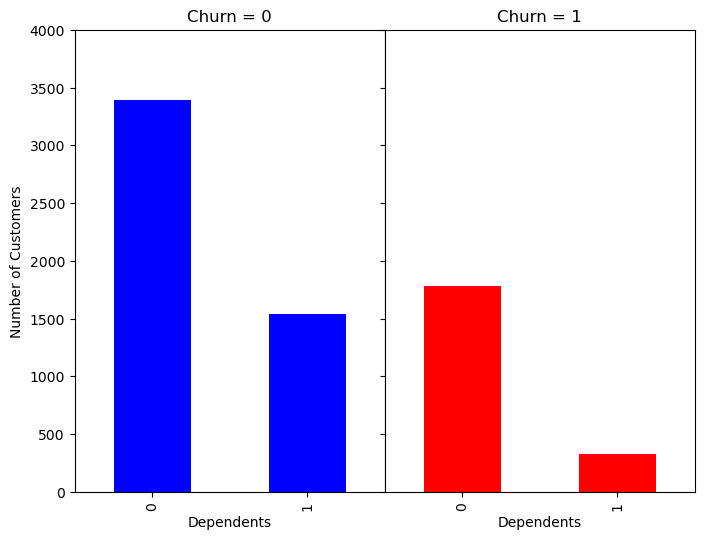

In [23]:
# Créer une nouvelle figure avec une taille de 8x6 pouces
plt.figure(figsize=(8, 6))

# Créer contingency table de Dependents et Churn
contingency_table = pd.crosstab(churn_c['Dependents'], churn_c['Churn'])

# Visualiser la contribution de Dependents à Churn, pour Churn = 0 et Churn = 1
churn_0 = contingency_table.loc[0, :]
churn_1 = contingency_table.loc[1, :]

plt.subplot(1, 2, 1)
churn_0.plot(kind='bar', color='blue')
plt.title('Churn = 0')
plt.xlabel('Dependents')
plt.ylabel('Number of Customers')
plt.ylim([0, 4000])

plt.subplot(1, 2, 2)
churn_1.plot(kind='bar', color='red')
plt.title('Churn = 1')
plt.xlabel('Dependents')
plt.ylim([0, 4000])
plt.gca().axes.yaxis.set_ticklabels([]) # disable y-axis tick labels

plt.subplots_adjust(wspace=0)
plt.show()



##### Les clients ayant des personnes à charge sont un peu moins susceptibles de se désabonner.

### Phone Service

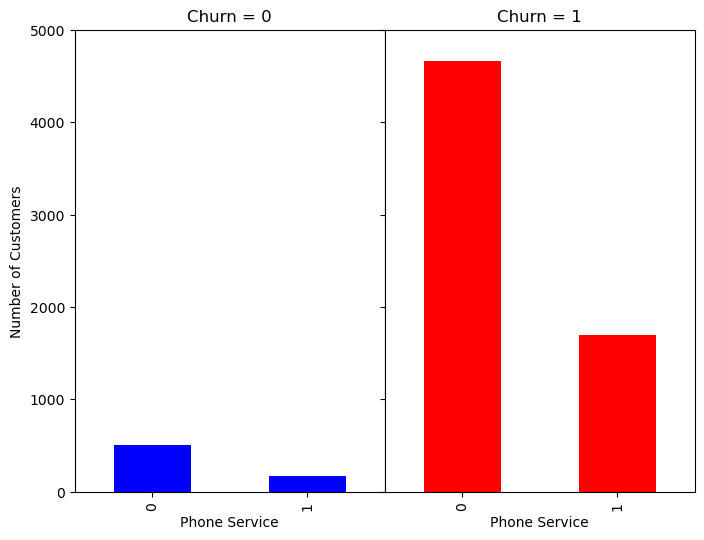

In [24]:
# Créer une nouvelle figure avec une taille de 8x6 pouces
plt.figure(figsize=(8, 6))

# Créer contingency table de Phone Service et Churn
contingency_table = pd.crosstab(churn_c['PhoneService'], churn_c['Churn'])

# Visualiser la contribution de Phone Service à Churn, pour Churn = 0 et Churn = 1
churn_0 = contingency_table.loc[0, :]
churn_1 = contingency_table.loc[1, :]

plt.subplot(1, 2, 1)
churn_0.plot(kind='bar', color='blue')
plt.title('Churn = 0')
plt.xlabel('Phone Service')
plt.ylabel('Number of Customers')
plt.ylim([0, 5000])

plt.subplot(1, 2, 2)
churn_1.plot(kind='bar', color='red')
plt.title('Churn = 1')
plt.xlabel('Phone Service')
plt.ylim([0, 5000])
plt.gca().axes.yaxis.set_ticklabels([]) # disable y-axis tick labels

plt.subplots_adjust(wspace=0)
plt.show()



##### Le service téléphonique semble avoir un impact sur la décision du client


### Multiple Lines

<Figure size 800x600 with 0 Axes>

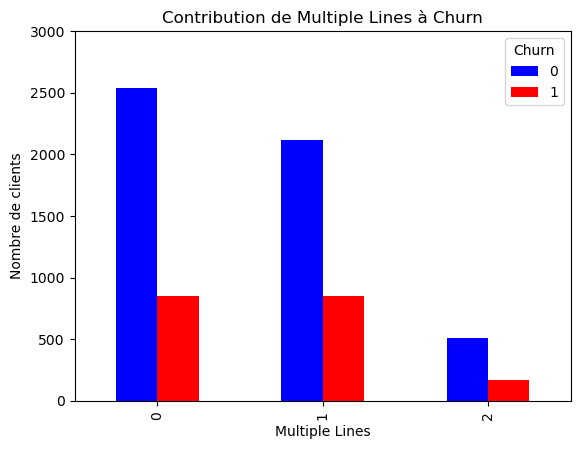

In [25]:
# Créer une nouvelle figure avec une taille de 8x6 pouces
plt.figure(figsize=(8, 6))

# Create a contingency table of MultipleLines and Churn
contingency_table = pd.crosstab(churn_c['MultipleLines'], churn_c['Churn'])

# Afficher le tableau en un graphique en barres
contingency_table.plot.bar(color=['blue', 'red'])
plt.title('Contribution de Multiple Lines à Churn')
plt.xlabel('Multiple Lines')
plt.ylabel('Nombre de clients')
plt.ylim([0, 3000])

plt.show()


###### 'Multiple lines' semble aussi avoir peu d'impact sur la décision du client

### Internet Service

<Figure size 800x600 with 0 Axes>

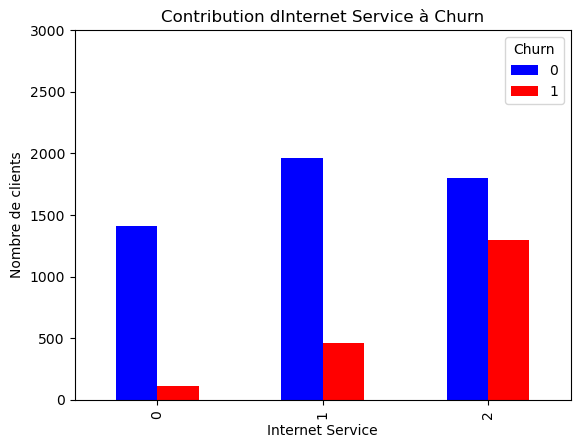

In [26]:
# Créer une nouvelle figure avec une taille de 8x6 pouces
plt.figure(figsize=(8, 6))

# Create a contingency table of MultipleLines and Churn
contingency_table = pd.crosstab(churn_c['InternetService'], churn_c['Churn'])

# Afficher le tableau en un graphique en barres
contingency_table.plot.bar(color=['blue', 'red'])
plt.title('Contribution dInternet Service à Churn')
plt.xlabel('Internet Service')
plt.ylabel('Nombre de clients')
plt.ylim([0, 3000])

plt.show()


##### Internet Service a un impact sur le taux de désabonnement. Les clients de la fibre optique sont plus susceptibles de chuter.


### Online Security

<Figure size 800x600 with 0 Axes>

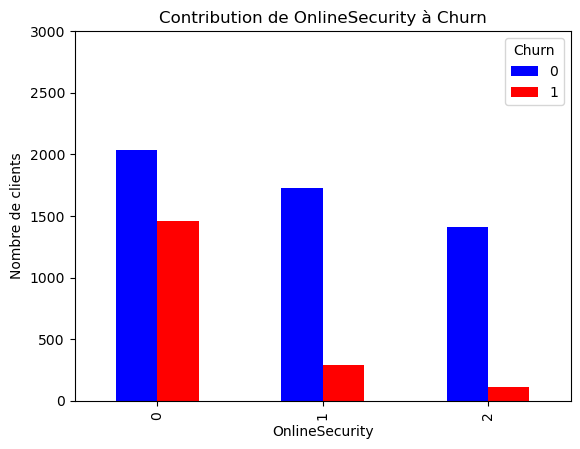

<Figure size 800x600 with 0 Axes>

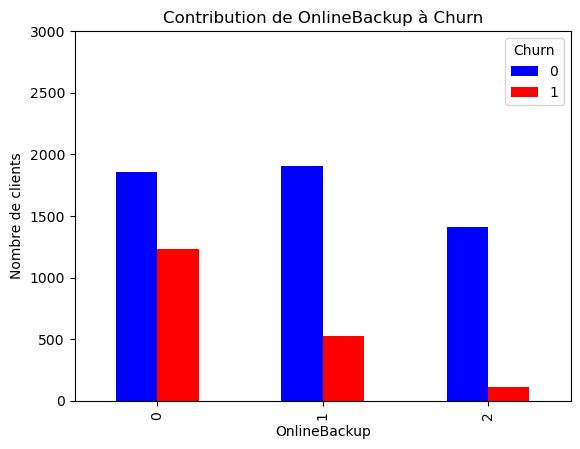

<Figure size 800x600 with 0 Axes>

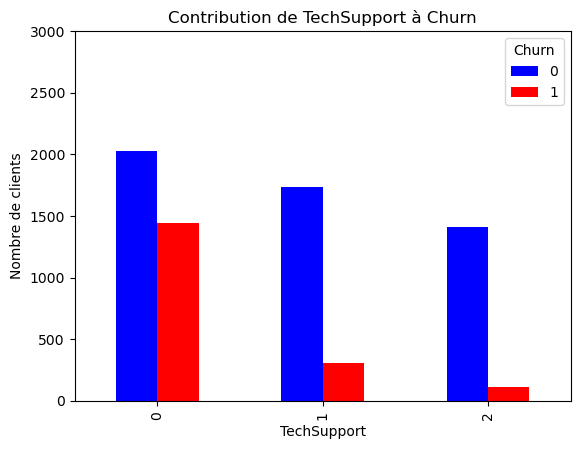

<Figure size 800x600 with 0 Axes>

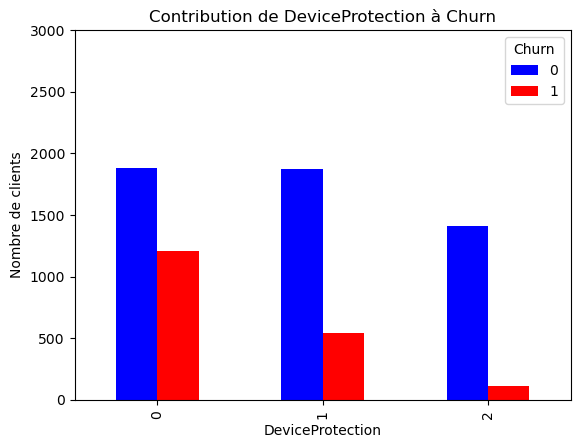

<Figure size 800x600 with 0 Axes>

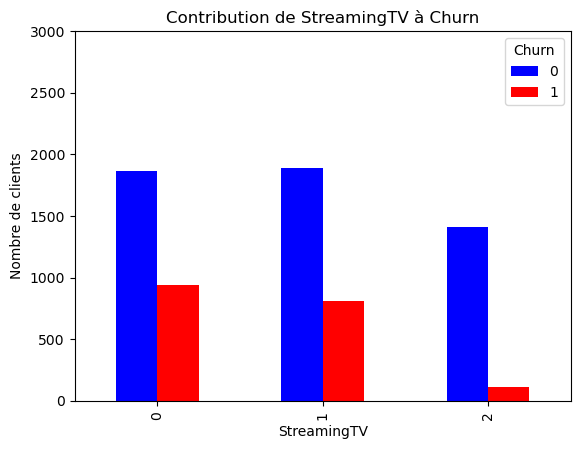

<Figure size 800x600 with 0 Axes>

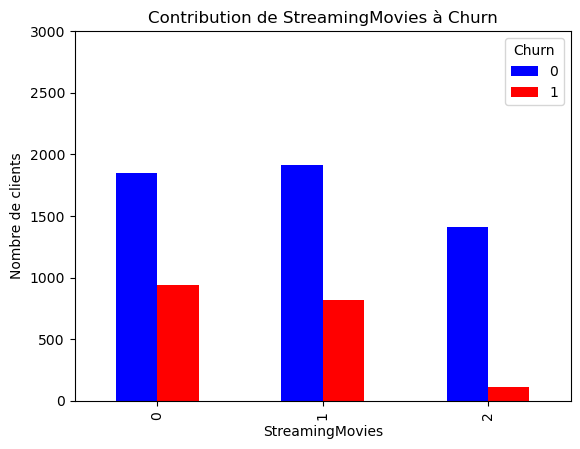

In [27]:
columns= ['OnlineSecurity', 'OnlineBackup','TechSupport', 'DeviceProtection', 'StreamingTV', 'StreamingMovies' ]
for col in columns:
    # Créer une nouvelle figure avec une taille de 8x6 pouces
    plt.figure(figsize=(8, 6))

    # Create a contingency table of Tech Support and Churn
    contingency_table = pd.crosstab(churn_c[col], churn_c['Churn'])

    # Afficher le tableau en un graphique en barres
    contingency_table.plot.bar(color=['blue', 'red'])
    plt.title(f"Contribution de {col} à Churn")
    plt.xlabel(f"{col}")
    plt.ylabel('Nombre de clients')
    plt.ylim([0, 3000])

    plt.show()



###### Online Security semble être une caractéristique importante. Les clients sans sécurité en ligne sont plus susceptibles de chuter.
##### Le manque de support technique ('Tec Support'), de services de sauvegarde en ligne ('Online Backup'), de protection de l'appareil ('Device Protection'), de Streaming TV et de Streaming Movies augmentent la probabilité de désabonnement.


### Contract

<Figure size 800x600 with 0 Axes>

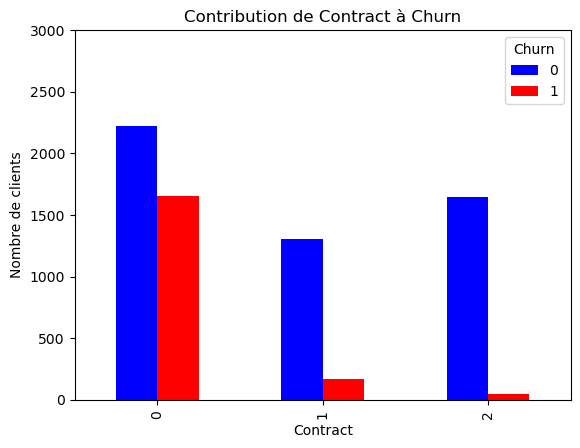

In [28]:
# Créer une nouvelle figure avec une taille de 8x6 pouces
plt.figure(figsize=(8, 6))

# Create a contingency table of Contract and Churn
contingency_table = pd.crosstab(churn_c['Contract'], churn_c['Churn'])

# Afficher le tableau en un graphique en barres
contingency_table.plot.bar(color=['blue', 'red'])
plt.title("Contribution de Contract à Churn")
plt.xlabel("Contract")
plt.ylabel('Nombre de clients')
plt.ylim([0, 3000])

plt.show()

###### 'Contract' semble être une caractéristique importante. Les clients de 'month-to-month' sont plus susceptibles de chuter.

### Paperless Billing

<Figure size 800x600 with 0 Axes>

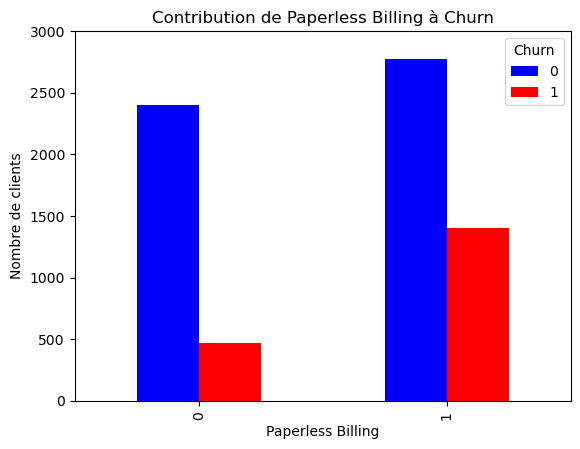

In [29]:
# Créer une nouvelle figure avec une taille de 8x6 pouces
plt.figure(figsize=(8, 6))

# Create a contingency table of Paperless Billing and Churn
contingency_table = pd.crosstab(churn_c['PaperlessBilling'], churn_c['Churn'])

# Afficher le tableau en un graphique en barres
contingency_table.plot.bar(color=['blue', 'red'])
plt.title("Contribution de Paperless Billing à Churn")
plt.xlabel("Paperless Billing")
plt.ylabel('Nombre de clients')
plt.ylim([0, 3000])

plt.show()

###### Paperless Billing semble aussi avoir peu d'impact sur la décision du client

### Payement Method

<Figure size 800x600 with 0 Axes>

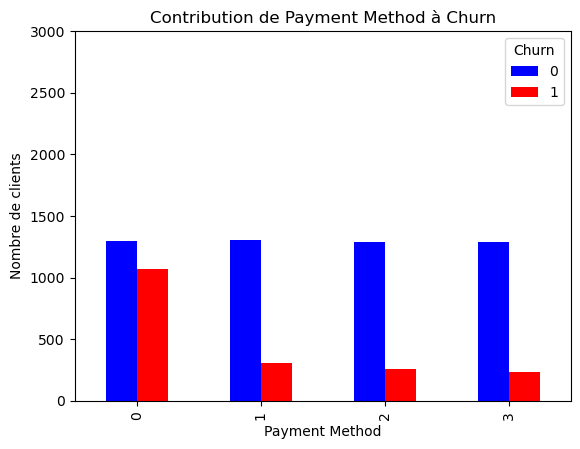

In [30]:
# Créer une nouvelle figure avec une taille de 8x6 pouces
plt.figure(figsize=(8, 6))

# Create a contingency table of Payment Method and Churn
contingency_table = pd.crosstab(churn_c['PaymentMethod'], churn_c['Churn'])

# Afficher le tableau en un graphique en barres
contingency_table.plot.bar(color=['blue', 'red'])
plt.title("Contribution de Payment Method à Churn")
plt.xlabel("Payment Method")
plt.ylabel('Nombre de clients')
plt.ylim([0, 3000])

plt.show()

###### Payment Method semble être une caractéristique importante. Les clients qui paye en 'Electronic check' sont plus susceptibles de chuter.

### Visualisation des Variables Continues

In [31]:
# Liste des colonnes numériques
columns = ['tenure', 'TotalCharges', 'MonthlyCharges']

# Créer un dictionnaire pour stocker les statistiques descriptives de chaque colonne
descriptive_stats = {}

# Calculer les statistiques descriptives pour chaque colonne
for col in columns:
    descriptive_stats[col] = churn_c[col].describe()

# Créer un DataFrame à partir des statistiques descriptives
df_descriptive_stats = pd.DataFrame(descriptive_stats)

# Afficher le tableau des statistiques descriptives
display(df_descriptive_stats)

tenure TotalCharges  MonthlyCharges
25%        9.000000          NaN       35.500000
50%       29.000000          NaN       70.350000
75%       55.000000          NaN       89.850000
count   7043.000000         7043     7043.000000
freq            NaN           11             NaN
max       72.000000          NaN      118.750000
mean      32.371149          NaN       64.761692
min        0.000000          NaN       18.250000
std       24.559481          NaN       30.090047
top             NaN                          NaN
unique          NaN         6531             NaN

<Axes: >

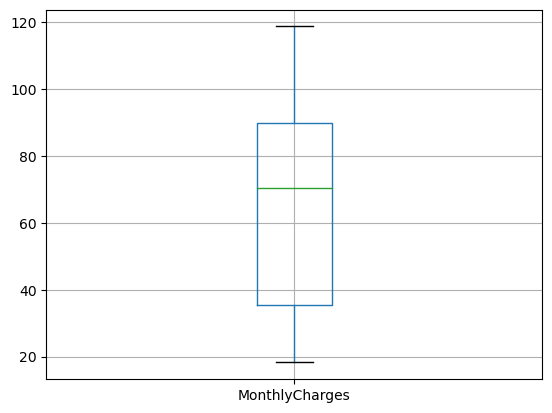

In [32]:
#Boites Moustaches
churn_c.boxplot('MonthlyCharges')

<Axes: >

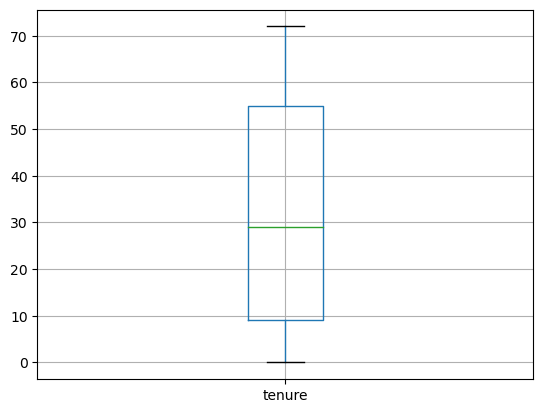

In [33]:
churn_c.boxplot('tenure')

In [34]:
churn_c['TotalCharges'].info

<bound method Series.info of 0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object>

In [35]:
# Convertir la colonne 'Total Charges' en type de données numériques
churn_c['TotalCharges'] = pd.to_numeric(churn_c['TotalCharges'], errors='coerce')

In [36]:
churn_c['TotalCharges'].info

<bound method Series.info of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64>

<Axes: >

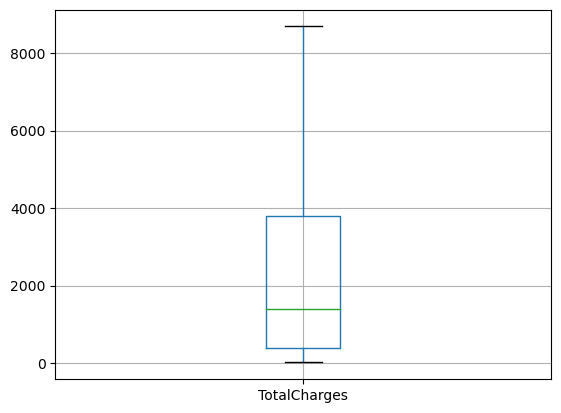

In [37]:
churn_c.boxplot('TotalCharges')

### Contribution des variables Numeriques  à 'Churn'

processing with tenure


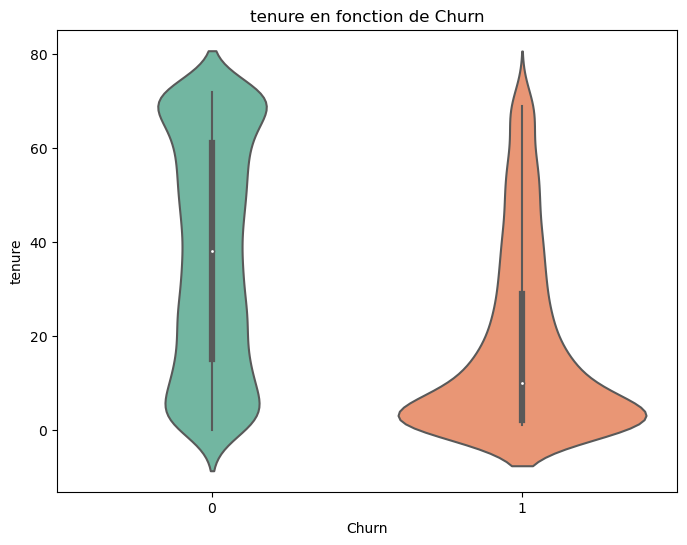

processing with TotalCharges


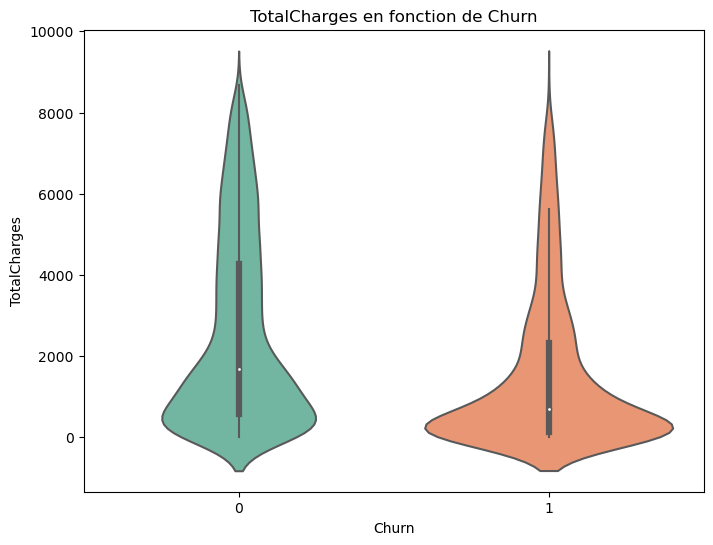

processing with MonthlyCharges


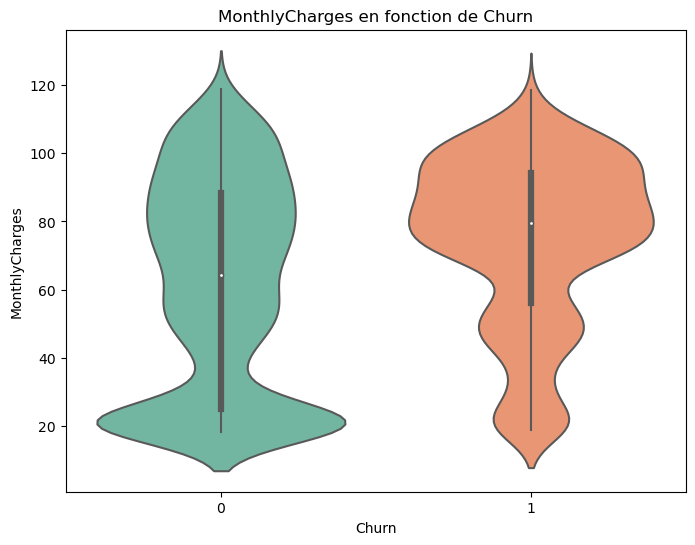

In [38]:
columns=['tenure','TotalCharges', 'MonthlyCharges']

for col in columns:
    print(f"processing with {col}")
    # Créer une nouvelle figure avec une taille de 8x6 pouces
    plt.figure(figsize=(8, 6))

    # Créer un violinplot de la variable en fonction de 'Churn'
    sns.violinplot(x='Churn', y=col, data=churn_c, palette='Set2')

    # Définir les titres et les étiquettes des axes
    plt.title(f"{col} en fonction de Churn")
    plt.xlabel('Churn')
    plt.ylabel(f"{col}")

    plt.show()

* Les clients à faible 'Tenure' sont beaucoup plus susceptibles de se désister.
* Dans le même temps, les clients qui n'ont pas churn sont répartis sur un large éventail de 'Tenure'.
* Le graphe indique que les 'Monthly Charges' ont un impact significatif sur la décision des clients de 'Churn'.
* Les clients avec des 'Monthly Charges' élevés sont beaucoup plus susceptibles de 'churn' que les clients avec un faible     montant de 'Monthly Charges'. En revanche, les clients dont les 'Monthly Charges' sont bas sont plus susceptibles de 'no Churn'.

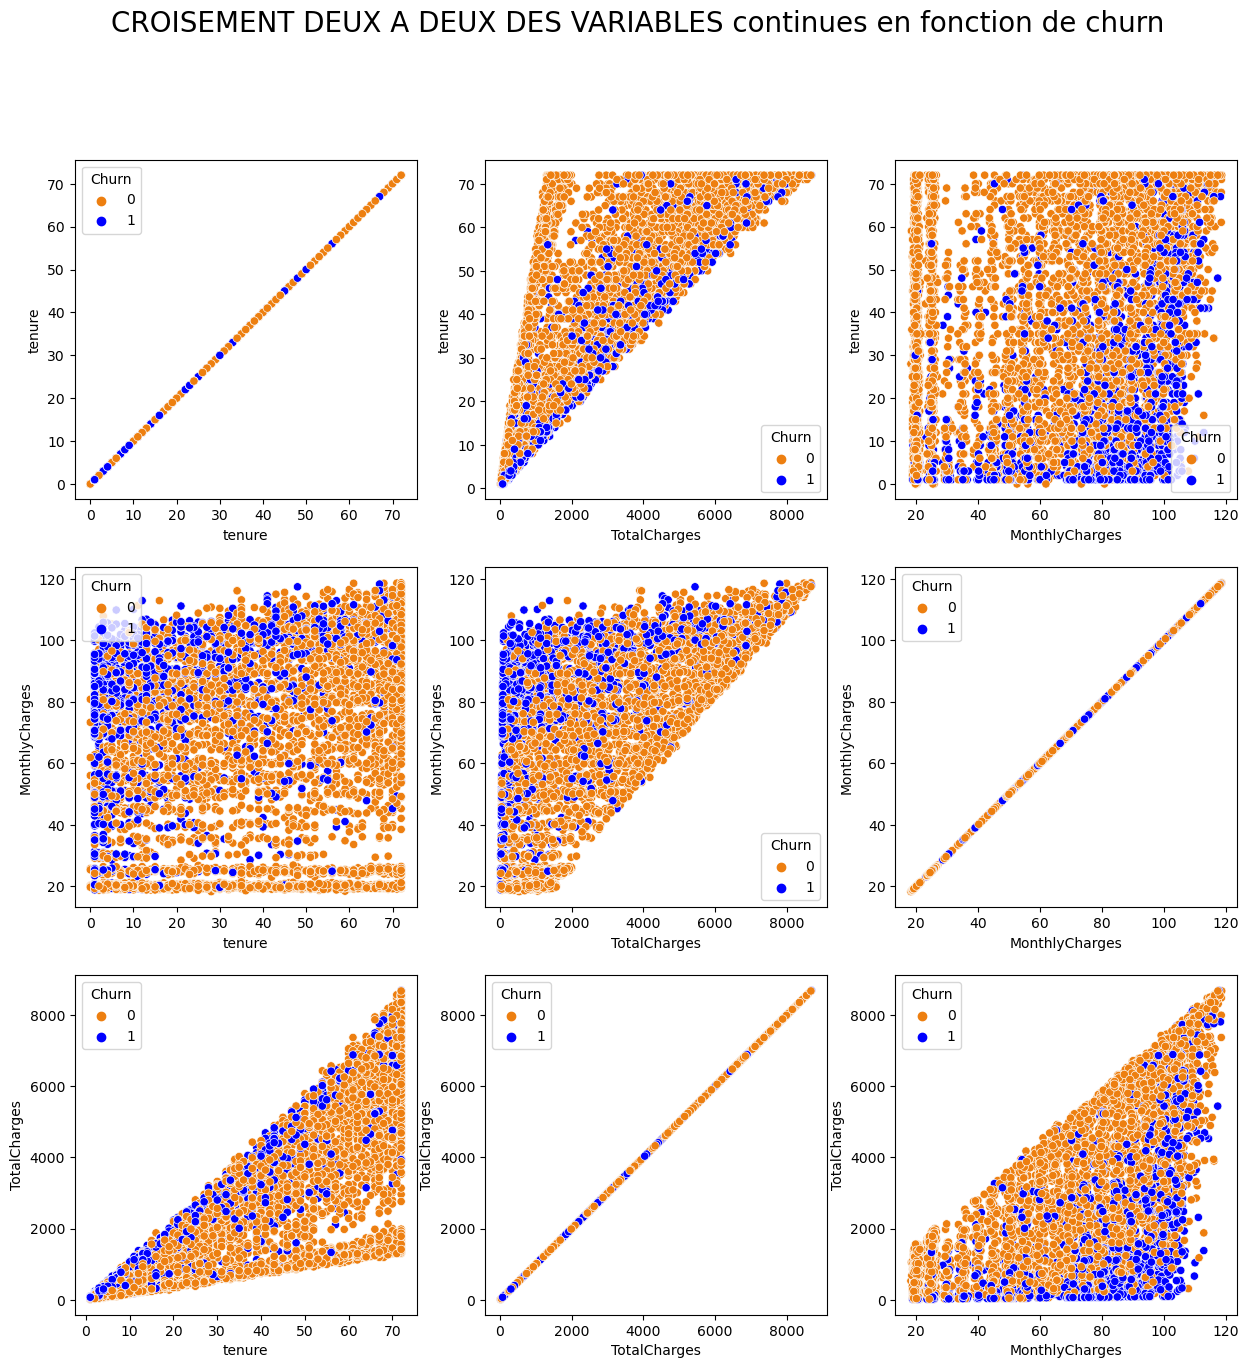

In [39]:
# Définir les variables continues
columns=['tenure', 'MonthlyCharges','TotalCharges']

# Définir la palette de couleurs pour les points
my_palette = sns.color_palette(["#ED7F10","#0000FF"])

# Définir la grille de graphiques
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Parcourir les colonnes et les sous-tracés
for i, col in enumerate(columns):
    sns.scatterplot(x='tenure', y=col, hue='Churn', data=churn_c,  ax=axes[i, 0], palette=my_palette)
    sns.scatterplot(x='MonthlyCharges', y=col, hue='Churn', data=churn_c, ax=axes[i, 2], palette=my_palette)
    sns.scatterplot(x='TotalCharges', y=col, hue='Churn', data=churn_c,  ax=axes[i, 1], palette=my_palette)

# Ajouter un titre pour la grille de graphiques
fig.suptitle('CROISEMENT DEUX A DEUX DES VARIABLES continues en fonction de churn', fontsize=20)

# Afficher la grille de graphiques
plt.show()


### Observation
- Les clients à faible 'tenure' sont beaucoup plus susceptibles de se désister
- Dans le même temps, les clients qui n'ont pas churn sont répartis sur un large éventail de 'Tenure Months'

- les 'Monthly Charges' ont un impact significatif sur la décision des clients de 'Churn'

- Les clients avec des 'Monthly Charges' élevés sont beaucoup plus susceptibles de 'churn' que les clients avec un faible montant de 'Monthly Charges'. En revanche, les clients dont les 'Monthly Charges' sont bas sont plus susceptibles de 'no Churn'.

- Les personnes ayant une ancienneté inférieure et des frais mensuels plus élevés ont tendance à se désister davantage.

- Avoir un contrat mensuel et un Internet par fibre optique ont un effet vraiment énorme sur la probabilité de désabonnement.

In [40]:
churn_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [41]:
print(churn_c.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


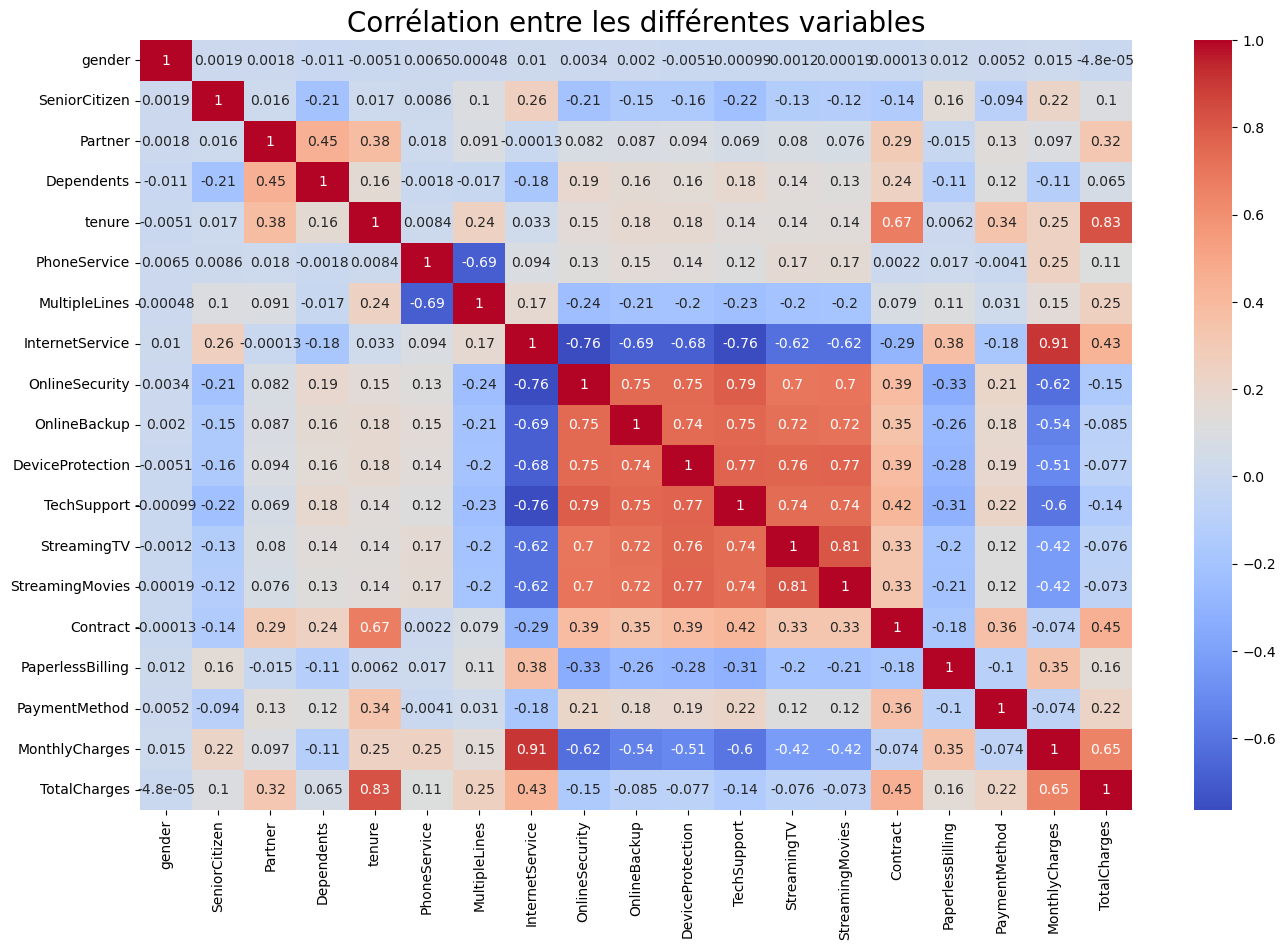

In [42]:
# Sélectionner les variables numériques
columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

# Calculer la matrice de corrélation
corr = churn_c[columns].corr()

# Créer une heatmap de corrélation
plt.figure(figsize=(16, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Corrélation entre les différentes variables', fontsize=20)
plt.show()


 <h2 style="color : blue;">Observations consernant le Graphe de corrélation</h2>

* Les Variables Corrélées positivement sont:
    (Internet Service,Monthly Charges) et (Total Charges,Tenure)
* Les Variables Corrélées Négativement sont:
    (Internet Service et : Online Security, tech support)

In [43]:
#Création d'une copie de la data set
data_set=churn_c
data_set

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 2                1               0             1   
1                 0                1               1             0   
2                 0                1               1             1   
3                 2                1               1             0   
4                 0                2               0             0   
...             ...              ...             ...           ...   
7038              1                1               1             0   
7039              1                2               0             1   
7040              2                1               1             0   
7041              1                2               0             0   
7042              0                2               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    1            0            0                0         1   
2                    0            0            0                0         0   
3                    1            1            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 1            1            1                1         1   
7039                 1            0            1                1         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 1            1            1                1         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              0           29.85         29.85      0  
1                    0              1           56.95       1889.50      0  
2                    1              1           53.85        108.15      1  
3                    0              2           42.30       1840.75      0  
4                    1              0           70.70        151.65      1  
...                ...            ...             ...           ...    ...  
7038                 1              1           84.80       1990.50      0  
7039                 1              3          103.20       7362.90      0  
7040                 1              0           29.60        346.45      0  
7041                 1              1           74.40        306.60      1  
7042                 1              2          105.65       6844.50      0  

[7043 rows x 20 columns]

In [44]:
#Separation de la Colonne sible des autres variables
features = churn_c.drop('Churn' , axis=1)
target = churn_c['Churn']

In [45]:
features

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          1              0        1           0       1             0   
1          0              0        0           0      34             1   
2          0              0        0           0       2             1   
3          0              0        0           0      45             0   
4          1              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       0              0        1           1      24             1   
7039       1              0        1           1      72             1   
7040       1              0        1           1      11             0   
7041       0              1        1           0       4             1   
7042       0              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 2                1               0             1   
1                 0                1               1             0   
2                 0                1               1             1   
3                 2                1               1             0   
4                 0                2               0             0   
...             ...              ...             ...           ...   
7038              1                1               1             0   
7039              1                2               0             1   
7040              2                1               1             0   
7041              1                2               0             0   
7042              0                2               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    1            0            0                0         1   
2                    0            0            0                0         0   
3                    1            1            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 1            1            1                1         1   
7039                 1            0            1                1         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 1            1            1                1         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    1              0           29.85         29.85  
1                    0              1           56.95       1889.50  
2                    1              1           53.85        108.15  
3                    0              2           42.30       1840.75  
4                    1              0           70.70        151.65  
...                ...            ...             ...           ...  
7038                 1              1           84.80       1990.50  
7039                 1              3          103.20       7362.90  
7040                 1              0           29.60        346.45  
7041                 1              1           74.40        306.60  
7042                 1              2          105.65       6844.50  

[7043 rows x 19 columns]

In [46]:
target

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [47]:
# Créer un DataFrame booléen indiquant les emplacements des valeurs manquantes
is_na = churn_c.isnull()

# Calculer le nombre total de valeurs manquantes dans chaque colonne
num_na = is_na.sum()

#afficher le nombre des NA
print(num_na)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [48]:
#Décomposer les données en : train data et test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.3,
                                                   random_state = 0)

In [49]:
#Vérification de la distribution des final classes
y_test.mean()

0.26171320397539044

In [50]:
y_train.mean()

0.2669371196754564

* Ces résultats confirment que la répartition des classes dans les ensembles d'entraînement et de test est cohérente avec les résultats précédents. Ainsi, la fonction train_test_split a fonctionné comme prévu en divisant les données de manière aléatoire tout en maintenant la répartition des classes.

# Modélisation

In [51]:
import numpy as np

# Vérification des valeurs manquantes et des valeurs infinies
if np.isnan(x_train).any().any() or np.isinf(x_train).any().any():
    # Traitement des valeurs manquantes et des valeurs infinies
    x_train = np.nan_to_num(x_train)  # Remplacer les valeurs nulles et infinies par des valeurs numériques

if np.isnan(x_test).any().any() or np.isinf(x_test).any().any():
    # Traitement des valeurs manquantes et des valeurs infinies
    x_test = np.nan_to_num(x_test)  # Remplacer les valeurs nulles et infinies par des valeurs numériques


Tester les paramétres max_depth et min_simple_split

Le paramétre max_depth est un seuil sur la profondeur_maximale de l'arbre

Ces paramétres permettent de mettre des contraintes sur la construction de l'arbre
et donc de controler directement le phénoméne de over_fitting


#choix du max_depth

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(f1)

# Affichage des résultats pour chaque valeur de max_depth
for i in range(len(max_depth_values)):
    print("max_depth:", max_depth_values[i])
    print("Accuracy:", accuracy_scores[i])
    print("Recall:", recall_scores[i])
    print("Precision:", precision_scores[i])
    print("F1-score:", f1_scores[i])
    print()



max_depth: 1
Accuracy: 0.7382867960246096
Recall: 0.0
Precision: 0.0
F1-score: 0.0

max_depth: 2
Accuracy: 0.7605300520586843
Recall: 0.6003616636528029
Precision: 0.5380875202593193
F1-score: 0.5675213675213676

max_depth: 3
Accuracy: 0.7856128726928537
Recall: 0.3435804701627486
Precision: 0.6785714285714286
F1-score: 0.4561824729891956

max_depth: 4
Accuracy: 0.7898722195929957
Recall: 0.4376130198915009
Precision: 0.6453333333333333
F1-score: 0.521551724137931

max_depth: 5
Accuracy: 0.7941315664931378
Recall: 0.5877034358047016
Precision: 0.6109022556390977
F1-score: 0.599078341013825

max_depth: 6
Accuracy: 0.7993374349266446
Recall: 0.5171790235081374
Precision: 0.6455981941309256
F1-score: 0.5742971887550201

max_depth: 7
Accuracy: 0.7889256980596309
Recall: 0.5280289330922242
Precision: 0.6121593291404612
F1-score: 0.5669902912621358

max_depth: 8
Accuracy: 0.7846663511594889
Recall: 0.4629294755877034
Precision: 0.6183574879227053
F1-score: 0.52947259565667

max_depth: 9
Accu

C:\Users\LAPTOP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


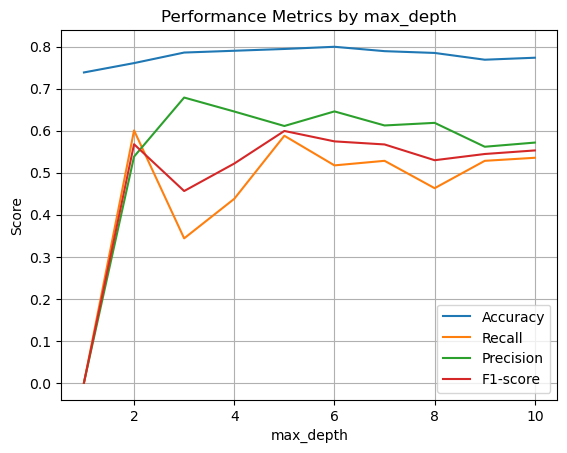

In [53]:
# Tracer les courbes de métriques
plt.plot(max_depth_values, accuracy_scores, label='Accuracy')
plt.plot(max_depth_values, recall_scores, label='Recall')
plt.plot(max_depth_values, precision_scores, label='Precision')
plt.plot(max_depth_values, f1_scores, label='F1-score')

plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Performance Metrics by max_depth')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
# Trouver le meilleur max_depth basé sur toutes les métriques
best_max_depth = max_depth_values[np.argmax([accuracy_scores, recall_scores, precision_scores, f1_scores]).max()]

print("Best max_depth:", best_max_depth)

Best max_depth: 6


#Choix du min_split

In [55]:
min_samples_split_values = [2, 3, 5, 10, 20]

accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

for min_samples_split in min_samples_split_values:
    clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=min_samples_split)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(f1)


    # Affichage des résultats pour chaque valeur de min_split
for i in range(len(min_samples_split_values)):
    print("min_split_values:", min_samples_split_values[i])
    print("Accuracy:", accuracy_scores[i])
    print("Recall:", recall_scores[i])
    print("Precision:", precision_scores[i])
    print("F1-score:", f1_scores[i])
    print()




min_split_values: 2
Accuracy: 0.738760056791292
Recall: 0.4918625678119349
Precision: 0.5009208103130756
F1-score: 0.49635036496350365

min_split_values: 3
Accuracy: 0.7434926644581165
Recall: 0.4864376130198915
Precision: 0.5104364326375711
F1-score: 0.4981481481481481

min_split_values: 5
Accuracy: 0.7453857075248462
Recall: 0.47739602169981915
Precision: 0.5146198830409356
F1-score: 0.4953095684803001

min_split_values: 10
Accuracy: 0.7359204921911974
Recall: 0.43037974683544306
Precision: 0.49480249480249483
F1-score: 0.4603481624758221

min_split_values: 20
Accuracy: 0.7430194036914339
Recall: 0.48282097649186256
Precision: 0.5095419847328244
F1-score: 0.4958217270194986



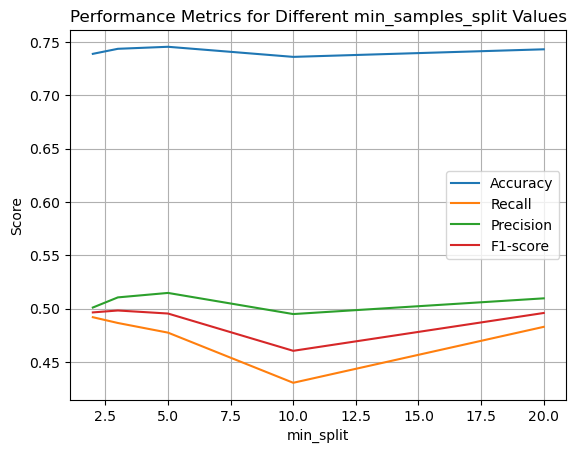

In [56]:
# Tracer les courbes de métriques
plt.plot(min_samples_split_values, accuracy_scores, label='Accuracy')
plt.plot(min_samples_split_values, recall_scores, label='Recall')
plt.plot(min_samples_split_values, precision_scores, label='Precision')
plt.plot(min_samples_split_values, f1_scores, label='F1-score')

plt.xlabel('min_split')
plt.ylabel('Score')
plt.title('Performance Metrics for Different min_samples_split Values')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
# Trouver le meilleur min_samples_split basé sur toutes les métriques
best_min_samples_split = min_samples_split_values[np.argmax([accuracy_scores, recall_scores, precision_scores, f1_scores]).max()]

print("Best min_samples_split:", best_min_samples_split)

Best min_samples_split: 5


In [58]:
# Construire l'arbre de décision avec les meilleures parametres
#avec entropy

modeltree = DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=5)
modeltree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=5)

In [59]:
predtree=modeltree.predict(x_test)

In [60]:
print(predtree[0:19])
print(y_test[0:19])

[0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0]
2200    0
4627    0
3225    0
2828    0
3768    0
4446    1
2234    0
5454    1
1278    0
578     0
5960    0
521     0
217     0
5716    0
202     0
134     1
154     0
4486    0
3283    0
Name: Churn, dtype: int64


In [61]:
# Calculer les différentes métriques d'évaluation avec meilleur parametres

accuracy = accuracy_score(y_test, predtree)
precision = precision_score(y_test, predtree)
recall = recall_score(y_test, predtree)
f1 = f1_score(y_test, predtree)


In [62]:
# Afficher les valeurs des métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7993374349266446
Precision: 0.6455981941309256
Recall: 0.5171790235081374
F1-score: 0.5742971887550201


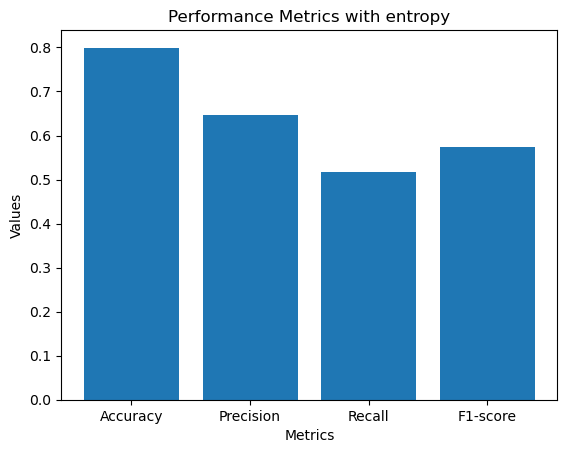

In [63]:
# Les valeurs des métriques
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Création du diagramme en bâtons
plt.bar(metrics, values)

# Ajout des titres et des labels des axes
plt.title('Performance Metrics with entropy')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Affichage du diagramme
plt.show()

In [65]:
import pydotplus
from sklearn import tree
from io import StringIO
import matplotlib.pyplot as plt


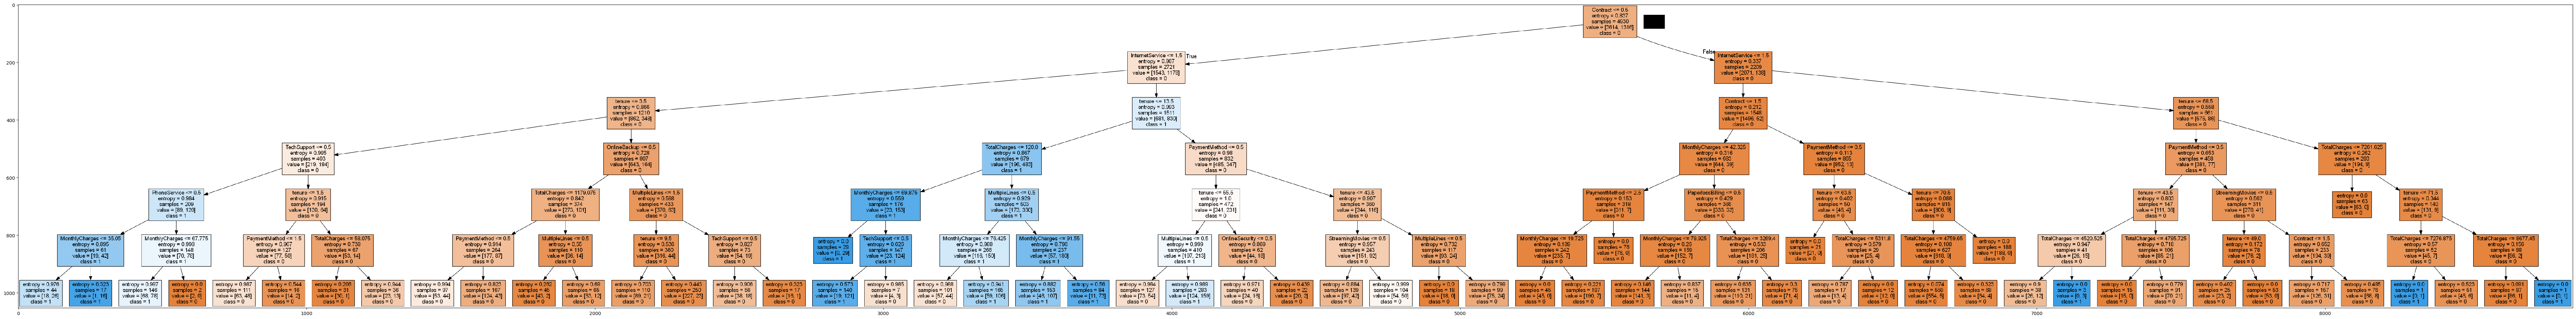

In [66]:
dot_data = StringIO()
filename = "modeltree_entropy.png"
featuresNames = churn_c.columns[0:19]  # Remplacez churn_c par le nom de votre DataFrame contenant les caractéristiques
targetNames = churn_c['Churn'].unique().astype(str).tolist()


out = tree.export_graphviz(modeltree, feature_names=featuresNames, out_file=dot_data, class_names=targetNames, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = plt.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')

In [67]:
from sklearn.metrics import classification_report

# Calculer le rapport de classification
report = classification_report(y_test,predtree)

# Afficher le rapport de classification
print("Rapport de classification :")
print(report)


Rapport de classification :
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1560
           1       0.65      0.52      0.57       553

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



#Essayer avec gini

Choix du max_depth


In [68]:
max_depth_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='gini',max_depth=max_depth)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(f1)

# Affichage des résultats pour chaque valeur de max_depth
for i in range(len(max_depth_values)):
    print("max_depth:", max_depth_values[i])
    print("Accuracy:", accuracy_scores[i])
    print("Recall:", recall_scores[i])
    print("Precision:", precision_scores[i])
    print("F1-score:", f1_scores[i])
    print()



max_depth: 1
Accuracy: 0.7382867960246096
Recall: 0.0
Precision: 0.0
F1-score: 0.0

max_depth: 2
Accuracy: 0.7605300520586843
Recall: 0.6003616636528029
Precision: 0.5380875202593193
F1-score: 0.5675213675213676

max_depth: 3
Accuracy: 0.7856128726928537
Recall: 0.3435804701627486
Precision: 0.6785714285714286
F1-score: 0.4561824729891956

max_depth: 4
Accuracy: 0.7893989588263133
Recall: 0.4376130198915009
Precision: 0.6436170212765957
F1-score: 0.5209903121636168

max_depth: 5
Accuracy: 0.7969711310932324
Recall: 0.538878842676311
Precision: 0.6313559322033898
F1-score: 0.5814634146341464

max_depth: 6
Accuracy: 0.7941315664931378
Recall: 0.4972875226039783
Precision: 0.6365740740740741
F1-score: 0.5583756345177665

max_depth: 7
Accuracy: 0.7808802650260294
Recall: 0.49909584086799275
Precision: 0.5974025974025974
F1-score: 0.5438423645320197

max_depth: 8
Accuracy: 0.7832465688594415
Recall: 0.488245931283906
Precision: 0.6067415730337079
F1-score: 0.5410821643286574

max_depth: 9
A

C:\Users\LAPTOP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


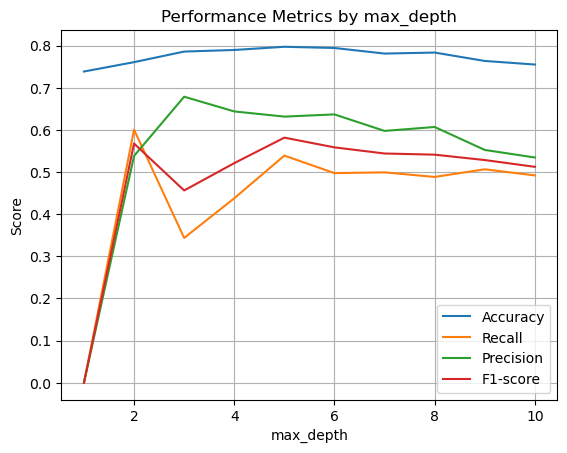

In [69]:
# Tracer les courbes de métriques
plt.plot(max_depth_values, accuracy_scores, label='Accuracy')
plt.plot(max_depth_values, recall_scores, label='Recall')
plt.plot(max_depth_values, precision_scores, label='Precision')
plt.plot(max_depth_values, f1_scores, label='F1-score')

plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('Performance Metrics by max_depth')
plt.legend()
plt.grid(True)
plt.show()

In [70]:
# Trouver le meilleur max_depth basé sur toutes les métriques
best_max_depth = max_depth_values[np.argmax([accuracy_scores, recall_scores, precision_scores, f1_scores]).max()]

print("Best max_depth:", best_max_depth)

Best max_depth: 5


#Choix du min_split

In [71]:
min_samples_split_values = [2, 3, 5, 10, 20]

accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

for min_samples_split in min_samples_split_values:
    clf = DecisionTreeClassifier(criterion='gini',min_samples_split=min_samples_split)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(f1)


    # Affichage des résultats pour chaque valeur de min_split
for i in range(len(min_samples_split_values)):
    print("min_split_values:", min_samples_split_values[i])
    print("Accuracy:", accuracy_scores[i])
    print("Recall:", recall_scores[i])
    print("Precision:", precision_scores[i])
    print("F1-score:", f1_scores[i])
    print()


min_split_values: 2
Accuracy: 0.718409843823947
Recall: 0.47920433996383366
Precision: 0.4632867132867133
F1-score: 0.47111111111111115

min_split_values: 3
Accuracy: 0.7288215806909607
Recall: 0.47739602169981915
Precision: 0.48175182481751827
F1-score: 0.47956403269754766

min_split_values: 5
Accuracy: 0.7321344060577378
Recall: 0.46473779385171793
Precision: 0.4876660341555977
F1-score: 0.4759259259259259

min_split_values: 10
Accuracy: 0.7449124467581637
Recall: 0.45750452079566006
Precision: 0.5142276422764228
F1-score: 0.4842105263157895

min_split_values: 20
Accuracy: 0.7557974443918599
Recall: 0.4448462929475588
Precision: 0.5406593406593406
F1-score: 0.4880952380952381



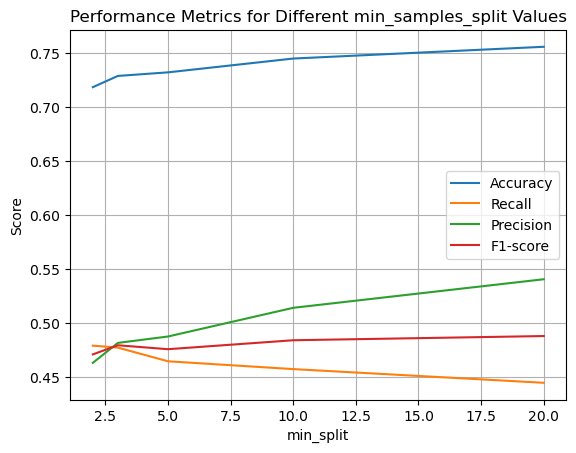

In [72]:
# Tracer les courbes de métriques
plt.plot(min_samples_split_values, accuracy_scores, label='Accuracy')
plt.plot(min_samples_split_values, recall_scores, label='Recall')
plt.plot(min_samples_split_values, precision_scores, label='Precision')
plt.plot(min_samples_split_values, f1_scores, label='F1-score')

plt.xlabel('min_split')
plt.ylabel('Score')
plt.title('Performance Metrics for Different min_samples_split Values')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
# Trouver le meilleur min_samples_split basé sur toutes les métriques
best_min_samples_split = min_samples_split_values[np.argmax([accuracy_scores, recall_scores, precision_scores, f1_scores]).max()]

print("Best min_samples_split:", best_min_samples_split)


Best min_samples_split: 20


#On va construire l'arbre de décision avec gini


In [74]:
modeltree = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=20)
modeltree.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=20)

In [75]:
predtree=modeltree.predict(x_test)

In [76]:
print(predtree[0:19])
print(y_test[0:19])

[0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0]
2200    0
4627    0
3225    0
2828    0
3768    0
4446    1
2234    0
5454    1
1278    0
578     0
5960    0
521     0
217     0
5716    0
202     0
134     1
154     0
4486    0
3283    0
Name: Churn, dtype: int64


In [77]:
# Calculer les différentes métriques d'évaluation avec meilleur parametres

accuracy = accuracy_score(y_test, predtree)
precision = precision_score(y_test, predtree)
recall = recall_score(y_test, predtree)
f1 = f1_score(y_test, predtree)



In [78]:
# Afficher les valeurs des métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7969711310932324
Precision: 0.6313559322033898
Recall: 0.538878842676311
F1-score: 0.5814634146341464


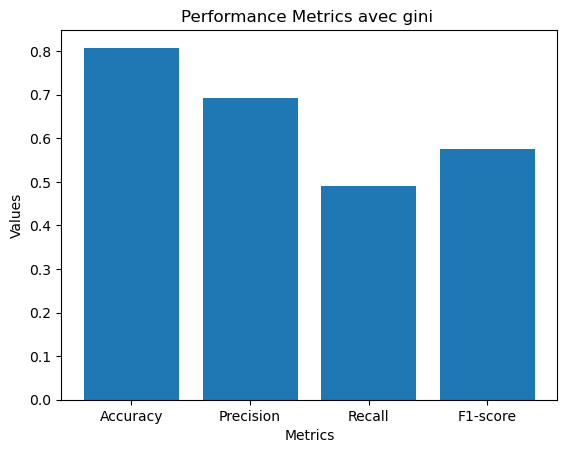

In [98]:
# Les valeurs des métriques
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Création du diagramme en bâtons
plt.bar(metrics, values)

# Ajout des titres et des labels des axes
plt.title('Performance Metrics avec gini ')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Affichage du diagramme
plt.show()

In [80]:
from sklearn.metrics import classification_report

# Calculer le rapport de classification
report = classification_report(y_test,predtree)

# Afficher le rapport de classification
print("Rapport de classification :")
print(report)

Rapport de classification :
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1560
           1       0.63      0.54      0.58       553

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



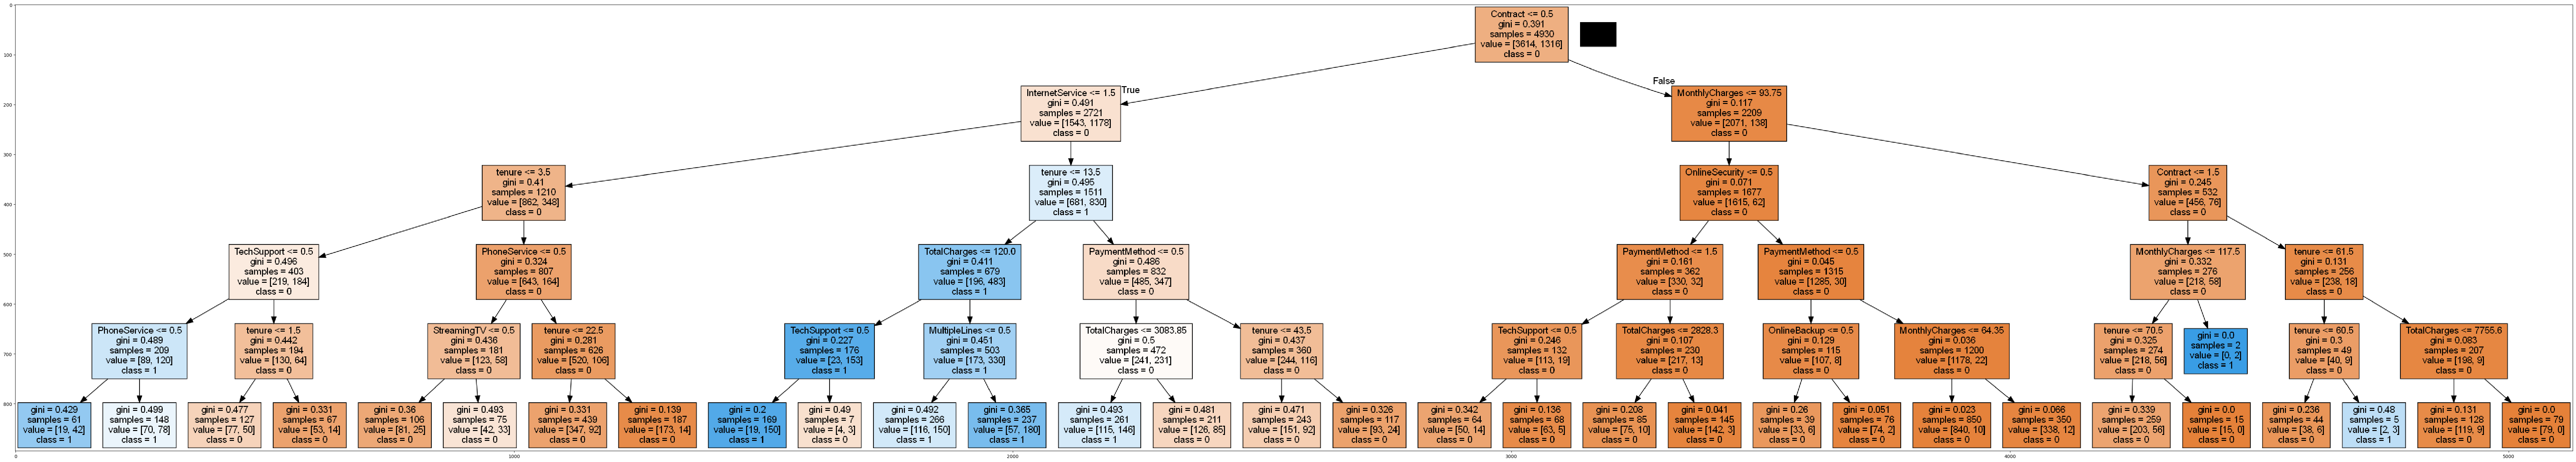

In [81]:
dot_data = StringIO()
filename = "modeltree.png"
featuresNames = churn_c.columns[0:19]  # Remplacez churn_c par le nom de votre DataFrame contenant les caractéristiques
targetNames = churn_c['Churn'].unique().astype(str).tolist()


out = tree.export_graphviz(modeltree, feature_names=featuresNames, out_file=dot_data, class_names=targetNames, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = plt.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')


#On va appliquer Random_Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)


In [83]:
# Vérification des valeurs manquantes et des valeurs infinies
if np.isnan(x_train).any().any() or np.isinf(x_train).any().any():
    # Traitement des valeurs manquantes et des valeurs infinies
    x_train = np.nan_to_num(x_train)  # Remplacer les valeurs nulles et infinies par des valeurs numériques

if np.isnan(x_test).any().any() or np.isinf(x_test).any().any():
    # Traitement des valeurs manquantes et des valeurs infinies
    x_test = np.nan_to_num(x_test)  # Remplacer les valeurs nulles et infinies par des valeurs numériques


In [84]:
#Définir une liste de différentes valeurs pour le paramètre n_estimators
n_estimators_values = [30, 50, 100, 150, 200,300]

#des listes vides pour stocker les résultats des métriques pour chaque valeur de n_estimators
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

#entraînez un classifieur Random Forest avec differente valeur,
#prédisez les étiquettes sur l'ensemble de test et calculez les métriques de performance
for n_estimators in n_estimators_values:
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred = rf_classifier.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    accuracy_scores.append(accuracy)
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(f1)

# Affichage des résultats pour chaque valeur de n_estimators
for i in range(len(n_estimators_values)):
    print("estimators values:", n_estimators_values[i])
    print("Accuracy:", accuracy_scores[i])
    print("Recall:", recall_scores[i])
    print("Precision:", precision_scores[i])
    print("F1-score:", f1_scores[i])
    print()



estimators values: 30
Accuracy: 0.7998580553584103
Recall: 0.46648793565683644
Precision: 0.6770428015564203
F1-score: 0.5523809523809523

estimators values: 50
Accuracy: 0.8076650106458482
Recall: 0.4906166219839142
Precision: 0.6931818181818182
F1-score: 0.5745682888540031

estimators values: 100
Accuracy: 0.8041163946061036
Recall: 0.47989276139410186
Precision: 0.685823754789272
F1-score: 0.5646687697160883

estimators values: 150
Accuracy: 0.8026969481902059
Recall: 0.48257372654155495
Precision: 0.6792452830188679
F1-score: 0.5642633228840126

estimators values: 200
Accuracy: 0.8019872249822569
Recall: 0.4879356568364611
Precision: 0.674074074074074
F1-score: 0.5660964230171073

estimators values: 300
Accuracy: 0.7998580553584103
Recall: 0.47989276139410186
Precision: 0.6704119850187266
F1-score: 0.559375



Visualisez les métriques dans une courbe :


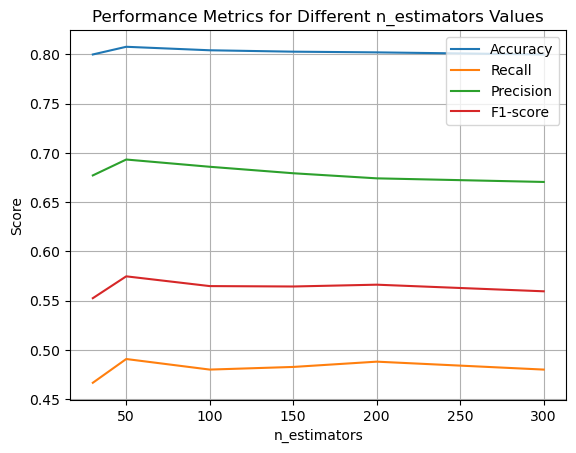

In [85]:
# Tracer les courbes de métriques
plt.plot(n_estimators_values, accuracy_scores, label='Accuracy')
plt.plot(n_estimators_values, recall_scores, label='Recall')
plt.plot(n_estimators_values, precision_scores, label='Precision')
plt.plot(n_estimators_values, f1_scores, label='F1-score')

plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('Performance Metrics for Different n_estimators Values')
plt.legend()
plt.grid(True)
plt.show()

In [86]:
# Trouver le meilleur min_samples_split basé sur toutes les métriques
best_estimator =n_estimators_values [np.argmax([accuracy_scores, recall_scores, precision_scores, f1_scores]).max()]

print("Best estimator:", best_estimator)

Best estimator: 50


In [87]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [88]:
y_pred = rf_classifier.predict(x_test)

In [89]:
print(y_pred[0:19])
print(y_test[0:19])

[1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0]
185     1
2715    0
3825    0
1807    1
132     0
1263    1
3732    0
1672    0
811     1
2526    1
2892    0
4129    0
2622    0
3801    1
4357    0
6179    1
5275    1
4640    1
833     0
Name: Churn, dtype: int64


In [90]:
# Calculer les différentes métriques d'évaluation

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [91]:
# Afficher les valeurs des métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8076650106458482
Precision: 0.6931818181818182
Recall: 0.4906166219839142
F1-score: 0.5745682888540031


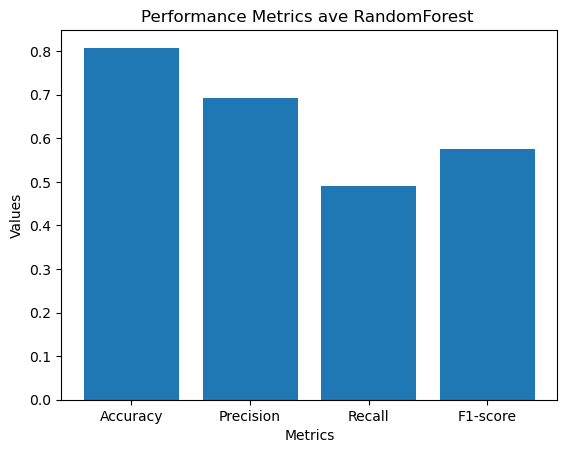

In [92]:
# Les valeurs des métriques
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Création du diagramme en bâtons
plt.bar(metrics, values)

# Ajout des titres et des labels des axes
plt.title('Performance Metrics ave RandomForest ')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Affichage du diagramme
plt.show()


In [93]:
from sklearn.metrics import classification_report

# Calculer le rapport de classification
report = classification_report(y_test,y_pred)

# Afficher le rapport de classification
print("Rapport de classification :")
print(report)

Rapport de classification :
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1036
           1       0.69      0.49      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [94]:
#Valeurs Nulls=Mean
x_train, x_test, y_train, y_test =train_test_split(features,target,test_size=0.3,random_state = 42)



In [95]:
# Calculate the average of each column
column_averages_test = x_test.mean()
column_averages_train = x_train.mean()


In [96]:
# Replace NaN values with the corresponding column average
x_test = x_test.fillna(column_averages_test)
x_train = x_train.fillna(column_averages_train)

In [97]:
x_test

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
185        1              0        1           0       1             0   
2715       0              0        0           0      41             1   
3825       1              0        1           1      52             1   
1807       1              0        0           0       1             1   
132        0              0        0           0      67             1   
...      ...            ...      ...         ...     ...           ...   
5522       1              0        0           0       1             1   
6377       0              0        0           0       1             0   
5500       0              0        1           1      60             1   
2392       0              0        0           0      20             1   
6705       0              0        1           1      22             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
185               2                1               0             0   
2715              1                0               2             2   
3825              0                0               2             2   
1807              0                2               0             0   
132               0                1               0             0   
...             ...              ...             ...           ...   
5522              0                2               0             0   
6377              2                1               0             1   
5500              0                1               1             1   
2392              1                2               0             0   
6705              0                1               0             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
185                  0            0            0                0         0   
2715                 2            2            2                2         0   
3825                 2            2            2                2         2   
1807                 1            0            0                0         0   
132                  0            1            0                0         2   
...                ...          ...          ...              ...       ...   
5522                 0            0            0                0         0   
6377                 0            1            0                1         0   
5500                 1            0            0                0         2   
2392                 1            0            1                0         0   
6705                 0            1            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
185                  1              0           24.80         24.80  
2715                 1              2           25.25        996.45  
3825                 0              1           19.35       1031.70  
1807                 0              0           76.35         76.35  
132                  0              2           50.55       3260.10  
...                ...            ...             ...           ...  
5522                 1              1           70.15         70.15  
6377                 1              1           44.65         44.65  
5500                 0              2           60.50       3694.45  
2392                 1              3           90.70       1781.35  
6705                 1              0           51.10       1232.90  

[2113 rows x 19 columns]

## Choix Des Attributs les plus influants selon la matrice de corrélation en terme de poids% à Churn et de sa corrélation a d'autres variables

In [99]:
#split (X) and the target (y)
columns_to_extract = ['DeviceProtection', 'OnlineBackup', 'TechSupport', 'OnlineSecurity', 'tenure','Contract','InternetService']

x_test = x_test[columns_to_extract]

x_train = x_train[columns_to_extract]



### Valeurs Nulls=Mean

In [100]:
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.3,random_state = 42)

# Calculate the average of each column
column_averages_test = x_test.mean()
column_averages_train = x_train.mean()


# Replace NaN values with the corresponding column average
x_test = x_test.fillna(column_averages_test)
x_train = x_train.fillna(column_averages_train)


### La fonction `fit_svm_model` permet de créer et entraîner des modèles SVM avec différentes combinaisons de paramètres, puis d'évaluer leurs performances en termes de précision, rappel, MAE et RMSE.

Les paramètres de la fonction sont les suivants :
- `X_train` : les données d'entraînement pour les caractéristiques (X).
- `y_train` : les données d'entraînement pour les étiquettes (y).
- `X_test` : les données de test pour les caractéristiques (X).
- `y_test` : les données de test pour les étiquettes (y).
- `c_values` : une liste des valeurs possibles pour le paramètre de régularisation C.
- `kernel_types` : une liste des types de noyau à utiliser.



In [101]:
def fit_svm_model(x_train, y_train, x_test, y_test, c_values, kernel_types):
    results = []
    for c in c_values:
        for kernel in kernel_types:
            # Create an SVM model with specified parameters
            svm_model = SVC(C=c, kernel=kernel)

            # Train the model
            svm_model.fit(x_train, y_train)

            # Make predictions on the test set
            y_pred = svm_model.predict(x_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)

            # Calculate recall
            recall = recall_score(y_test, y_pred)

            # Calculate MAE
            mae = mean_absolute_error(y_test, y_pred)

            # Calculate RMSE
            rmse = sqrt(mean_squared_error(y_test, y_pred))

            # Print the metrics
            print(f"Kernel: {kernel}, C: {c}")
            print("Accuracy:", accuracy)
            print("Recall:", recall)
            print("MAE:", mae)
            print("RMSE:", rmse)
            print("------------")
            
            results.append({
                "Kernel": kernel,
                "C": c,
                "Accuracy": accuracy,
                "Recall": recall,
                "MAE": mae,
                "RMSE": rmse
            })

    return results

# Exploration des paramètres de SVM afin de trouver une combinaison qui nous donne les meilleurs resultats de prediction
### Aprés plusieurs Combinaisons le Kernel "Lineaire" avec une valeur de régularisation: C=10

In [103]:
from sklearn.svm import SVC

c_values =[1, 10, 100]
kernel_types = ['linear', 'rbf', 'sigmoid']
metrics = ["Accuracy", "Recall", "MAE", "RMSE"]

results = fit_svm_model(x_train, y_train, x_test, y_test, c_values, kernel_types)



Kernel: linear, C: 1
Accuracy: 0.791292001893043
Recall: 0.445993031358885
MAE: 0.20870799810695692
RMSE: 0.45684570492339854
------------
Kernel: rbf, C: 1
Accuracy: 0.7283483199242783
Recall: 0.0
MAE: 0.2716516800757217
RMSE: 0.521202148955395
------------
Kernel: sigmoid, C: 1
Accuracy: 0.645527685754851
Recall: 0.34668989547038326
MAE: 0.3544723142451491
RMSE: 0.5953757756620176
------------
Kernel: linear, C: 10
Accuracy: 0.7893989588263133
Recall: 0.45121951219512196
MAE: 0.2106010411736867
RMSE: 0.4589128906161677
------------
Kernel: rbf, C: 10
Accuracy: 0.7586370089919545
Recall: 0.15156794425087108
MAE: 0.24136299100804542
RMSE: 0.49128707596276683
------------
Kernel: sigmoid, C: 10
Accuracy: 0.6436346426881212
Recall: 0.34668989547038326
MAE: 0.35636535731187885
RMSE: 0.5969634472158901
------------
Kernel: linear, C: 100
Accuracy: 0.7851396119261713
Recall: 0.43902439024390244
MAE: 0.21486038807382868
RMSE: 0.4635303529153497
------------
Kernel: rbf, C: 100
Accuracy: 0.78

### Visualisation des scores Accuracy, Recall Mae and rmse en changant les valeurs de C et les Kernels

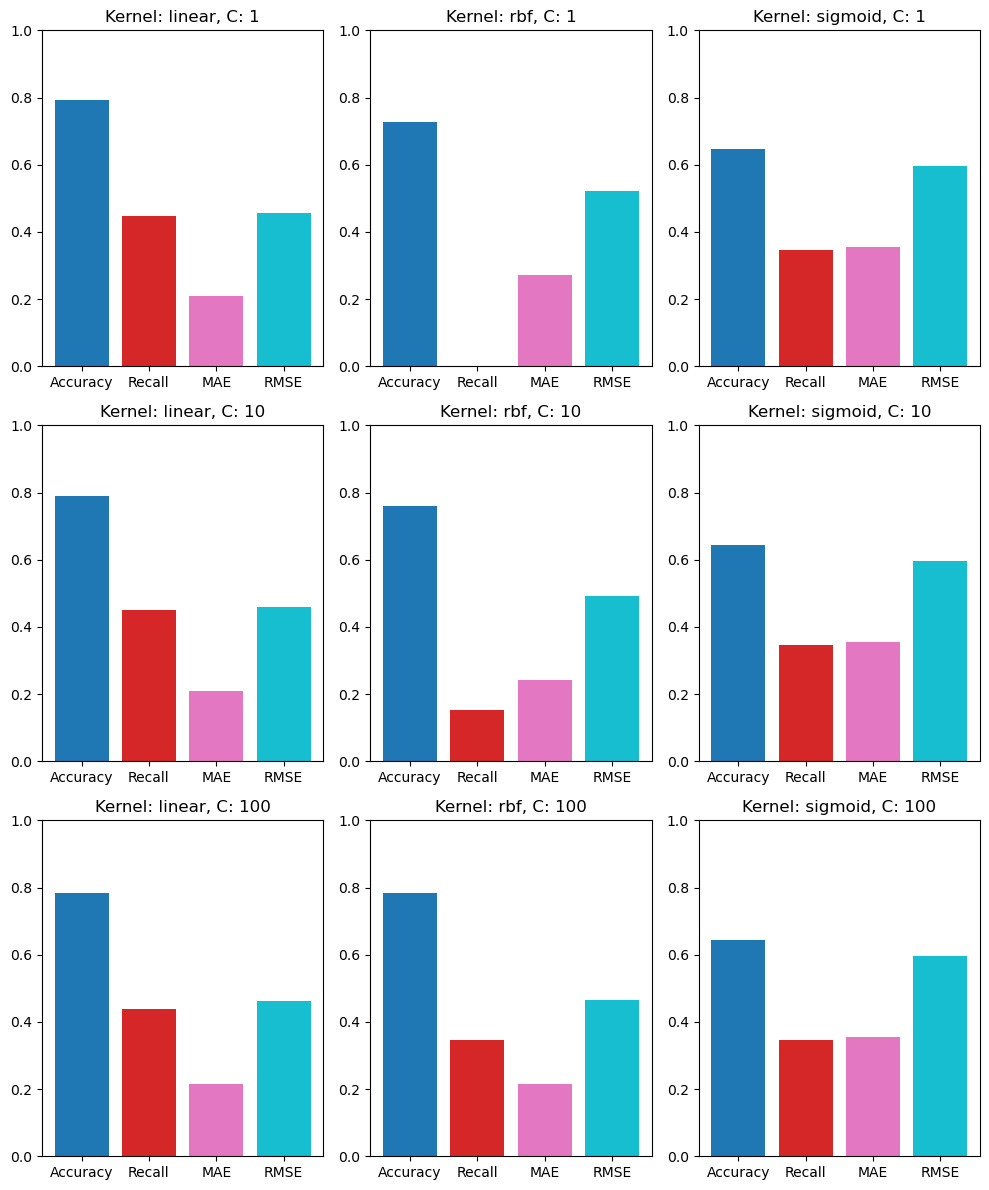

In [104]:
data = results

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(10, 12))

# Define the colors for the values
colors = plt.cm.tab10(np.linspace(0, 1, len(data[0]) - 2))

# Plot the data in each subplot
for i, ax in enumerate(axes.flatten()):
    kernel = data[i]['Kernel']
    c = data[i]['C']
    values = {key: value for key, value in data[i].items() if key not in ['Kernel', 'C']}
    x = np.arange(len(values))
    ax.bar(x, values.values(), color=colors)
    ax.set_title(f'Kernel: {kernel}, C: {c}')
    ax.set_xticks(x)
    ax.set_xticklabels(values.keys())
    ax.set_ylim(0, 1)

# Adjust the layout and spacing between subplots
fig.tight_layout()

# Display the plot
plt.show()


In [105]:
def extract_values(key, data):
    values = []
    for dictionary in data:
        if key in dictionary:
            values.append(dictionary[key])
    return values



In [106]:
kernel_list = extract_values("Kernel", results)
c_list = extract_values("C", results)
accuracy_list = extract_values("Accuracy", results)
recall_list = extract_values("Recall", results)
mae_list = extract_values("MAE", results)
rmse_list = extract_values("RMSE", results)


combined_set = {'{} {}'.format(c, kernel) for c, kernel in itertools.product(c_list, kernel_list)}
combined_list = list(combined_set)
combined_list = sorted(combined_list)
print(combined_list)



['1 linear', '1 rbf', '1 sigmoid', '10 linear', '10 rbf', '10 sigmoid', '100 linear', '100 rbf', '100 sigmoid']


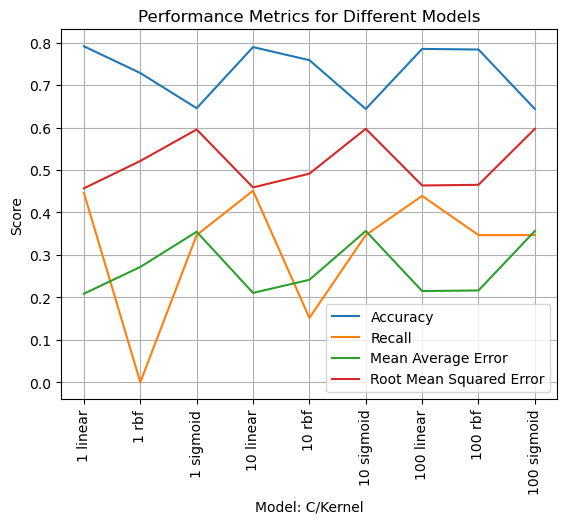

In [126]:
 # Tracer les courbes de métriques
plt.plot(combined_list, accuracy_list, label='Accuracy')
plt.plot(combined_list, recall_list, label='Recall')
plt.plot(combined_list, mae_list, label='Mean Average Error')
plt.plot(combined_list, rmse_list, label='Root Mean Squared Error')

    
plt.xticks(rotation='vertical')
plt.xlabel('Model: C/Kernel')
plt.ylabel('Score')
plt.title('Performance Metrics for Different Models')
plt.legend()
plt.grid(True)
plt.show()

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# Fitting des differents modèles: Naive Bayes :

- 'Gaussian Naive Bayes'
- 'Multinomial Naive Bayes'
- 'Bernoulli Naive Bayes'


In [108]:
# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
gnb_pred = gnb_model.predict(x_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_recall = recall_score(y_test, gnb_pred)
gnb_mae = mean_absolute_error(y_test, gnb_pred)
gnb_rmse = sqrt(mean_squared_error(y_test, gnb_pred))

# Multinomial Naive Bayes
mnb_model = MultinomialNB()
mnb_model.fit(x_train, y_train)
mnb_pred = mnb_model.predict(x_test)
mnb_accuracy = accuracy_score(y_test, mnb_pred)
mnb_recall = recall_score(y_test, mnb_pred)
mnb_mae = mean_absolute_error(y_test, mnb_pred)
mnb_rmse = sqrt(mean_squared_error(y_test, mnb_pred))

# Bernoulli Naive Bayes
bnb_model = BernoulliNB()
bnb_model.fit(x_train, y_train)
bnb_pred = bnb_model.predict(x_test)
bnb_accuracy = accuracy_score(y_test, bnb_pred)
bnb_recall = recall_score(y_test, bnb_pred)
bnb_mae = mean_absolute_error(y_test, bnb_pred)
bnb_rmse = sqrt(mean_squared_error(y_test, bnb_pred))

# Print the metrics
print("Gaussian Naive Bayes:")
print("Accuracy:", gnb_accuracy)
print("Recall:", gnb_recall)
print("MAE:", gnb_mae)
print("RMSE:", gnb_rmse)
print("------------")

print("Multinomial Naive Bayes:")
print("Accuracy:", mnb_accuracy)
print("Recall:", mnb_recall)
print("MAE:", mnb_mae)
print("RMSE:", mnb_rmse)
print("------------")

print("Bernoulli Naive Bayes:")
print("Accuracy:", bnb_accuracy)
print("Recall:", bnb_recall)
print("MAE:", bnb_mae)
print("RMSE:", bnb_rmse)
print("------------")

Gaussian Naive Bayes:
Accuracy: 0.7174633222905821
Recall: 0.8449477351916377
MAE: 0.28253667770941787
RMSE: 0.5315417930035398
------------
Multinomial Naive Bayes:
Accuracy: 0.6838618078561287
Recall: 0.7700348432055749
MAE: 0.3161381921438713
RMSE: 0.5622616758626461
------------
Bernoulli Naive Bayes:
Accuracy: 0.738760056791292
Recall: 0.7508710801393729
MAE: 0.261239943208708
RMSE: 0.5111163695370243
------------


## Visualisation Des Resultats

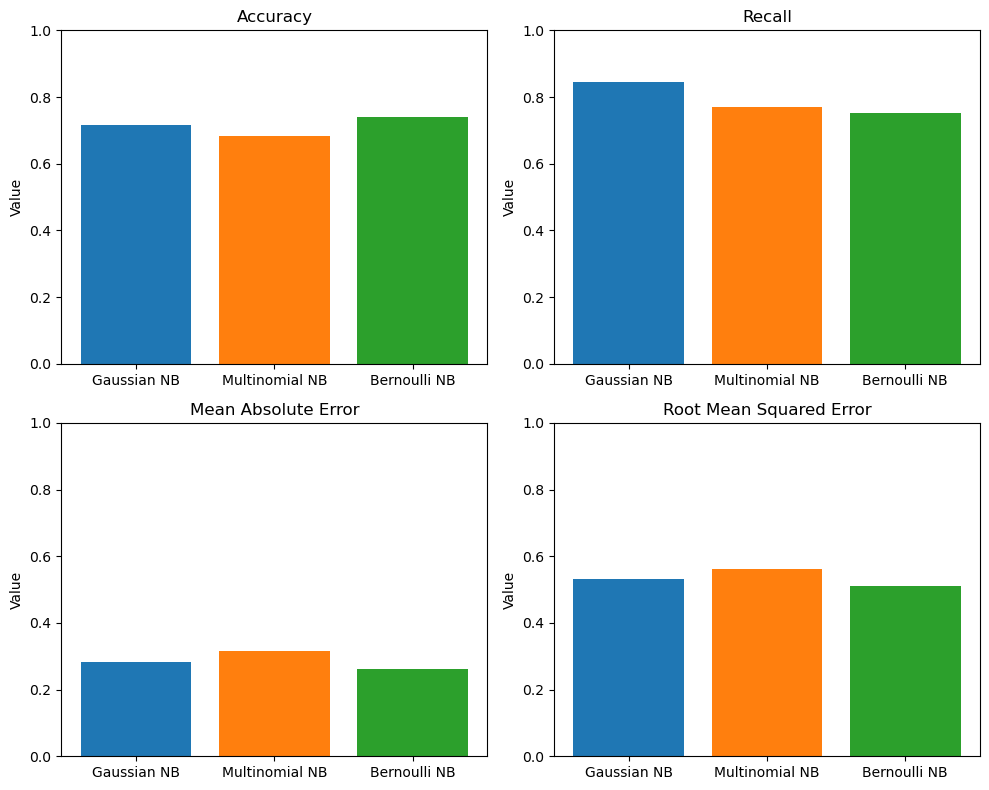

In [109]:

# Lists to store the metric values
accuracy = [gnb_accuracy, mnb_accuracy, bnb_accuracy]
recall = [gnb_recall, mnb_recall, bnb_recall]
mae = [gnb_mae, mnb_mae, bnb_mae]
rmse = [gnb_rmse, mnb_rmse, bnb_rmse]

# Labels for the models
models = ["Gaussian NB", "Multinomial NB", "Bernoulli NB"]

# Color for each model
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Plotting the metrics
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Accuracy
axs[0, 0].bar(models, accuracy, color=colors)
axs[0, 0].set_title("Accuracy")
axs[0, 0].set_ylabel("Value")
axs[0, 0].set_ylim([0, 1.0])  # Set the y-axis range

# Recall
axs[0, 1].bar(models, recall, color=colors)
axs[0, 1].set_title("Recall")
axs[0, 1].set_ylabel("Value")
axs[0, 1].set_ylim([0, 1.0])  # Set the y-axis range

# MAE
axs[1, 0].bar(models, mae, color=colors)
axs[1, 0].set_title("Mean Absolute Error")
axs[1, 0].set_ylabel("Value")
axs[1, 0].set_ylim([0, 1.0])  # Set the y-axis range

# RMSE
axs[1, 1].bar(models, rmse, color=colors)
axs[1, 1].set_title("Root Mean Squared Error")
axs[1, 1].set_ylabel("Value")
axs[1, 1].set_ylim([0, 1.0])  # Set the y-axis range

# Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show()

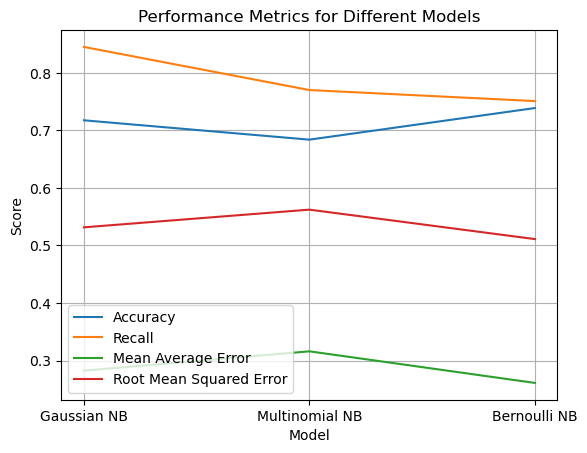

In [110]:
 # Tracer les courbes de métriques
plt.plot(models, accuracy, label='Accuracy')
plt.plot(models, recall, label='Recall')
plt.plot(models, mae, label='Mean Average Error')
plt.plot(models, rmse, label='Root Mean Squared Error')


plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics for Different Models')
plt.legend()
plt.grid(True)
plt.show()


### Bernouli Naive Bayes et Gaussian Naive Bayes ont des scores proches, Gaussian Naive Bayes Gaussien a un meilleur rappel mais une MAE et une RMSE un peu moins bonnes, Naive Bayes Gaussien sur la base de la valeur de rappel(Recall) pourrait être le meilleur modèle parmi les modèles Naive Bayes.

# choix final  du modele 

# Arbre de decision 

In [111]:
# Construire l'arbre de décision avec les meilleures parametres
#avec entropy

modeltree = DecisionTreeClassifier(criterion='entropy',max_depth=6,min_samples_split=5)


In [112]:
modeltree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=5)

In [113]:
predtree=modeltree.predict(x_test)

In [114]:
accuracy_Tree = accuracy_score(y_test, predtree)

In [115]:
print("Accuracy:", accuracy_Tree)

Accuracy: 0.7931850449597728


# RandomForest 

In [116]:
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

In [117]:
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [118]:
y_pred = rf_classifier.predict(x_test)

In [119]:
accuracy_random = accuracy_score(y_test, y_pred)

In [120]:
print("Accuracy:", accuracy_random)

Accuracy: 0.7898722195929957


# SVM

In [121]:
c_values =[10]
kernel_types = ['linear']
metrics = ["Accuracy"]

final_result = fit_svm_model(x_train, y_train, x_test, y_test, c_values, kernel_types)

Kernel: linear, C: 10
Accuracy: 0.7893989588263133
Recall: 0.45121951219512196
MAE: 0.2106010411736867
RMSE: 0.4589128906161677
------------


In [122]:
accuracy_SVM= final_result[0]['Accuracy']
accuracy_SVM

0.7893989588263133

# Naives Bayes Bernoulli 

In [123]:
# Bernoulli Naive Bayes
bnb_model = BernoulliNB()
bnb_model.fit(x_train, y_train)
bnb_pred = bnb_model.predict(x_test)
bnb_accuracy = accuracy_score(y_test, bnb_pred)

In [124]:
bnb_accuracy

0.738760056791292

# Visualisation de taux de performance de chaque algorithme 

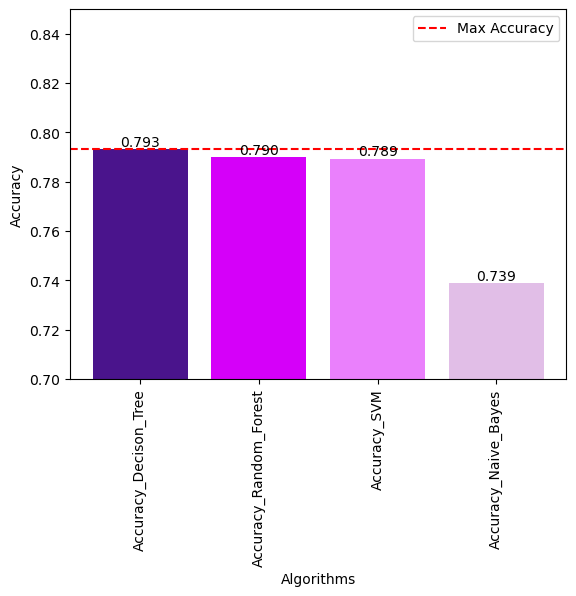

In [125]:
import matplotlib.pyplot as plt

# Données à afficher
valeurs = [accuracy_Tree, accuracy_random, accuracy_SVM, bnb_accuracy]
etiquettes = ['Accuracy_Decison_Tree', 'Accuracy_Random_Forest', 'Accuracy_SVM', 'Accuracy_Naive_Bayes']

# Color for each model
colors = ["#4A148C", "#D500F9", "#EA80FC", "#E1BEE7"]

plt.xticks(rotation='vertical')

# Affichage des valeurs d'accuracy
for i in range(len(valeurs)):
    plt.text(i, valeurs[i], f"{valeurs[i]:.3f}", ha='center', va='bottom')

# Création du graphique à barres
plt.bar(etiquettes, valeurs, color=colors)

# Recherche de la valeur d'accuracy la plus élevée
max_accuracy = max(valeurs)

# Recherche de l'index correspondant à la valeur d'accuracy la plus élevée
max_accuracy_index = valeurs.index(max_accuracy)

# Ajout d'une ligne pour la valeur d'accuracy la plus élevée
plt.axhline(y=max_accuracy, color='red', linestyle='--', label='Max Accuracy')

# Définition des limites des axes
plt.ylim(0.7, 0.85)

# Ajout de labels aux axes
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')

# Ajout de la légende
plt.legend()

# Affichage du graphique
plt.show()
